# PTDS2403 - Regression

### Project Title: Data Science Regression Project
#### Done By: David Harrison

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## 1.  Background Context
<a href=#cont>Back to Table of Contents</a>

Our team of consultants have been tasked by a coalition of agricultural stakeholders to analyse and predict the effect of CO2 on climate change from emissions from the agri-food sector.  We have been provided with emission data, as well as population data, compiled by the Food and Agriculture Organisation and the Intergovernmental Panel on Climate Change.  This data spans the period 1990 to 2020 and covers nearly all areas across the world, providing emission data from 23 sources.

Climate change represented by shifts in temperature can have catastrophic impacts on our environment and future existence.  Natural disasters, as can be seen in just the last few months appear to be on the increase.  Certain crops require particular environments to thrive, and if these are threatened our food supply could be threatened.


Our aim through this project is to understand trends and through regression analysis identify the emission sources that are most likely leading to changes in the Average Temperature.



<a href=#one></a>
## 2.  Importing Packages
<a href=#cont>Back to Table of Contents</a>


Various libraries and packages are imported in order to do data analysis (Numpy, Pandas), and visualisations (Matplotlib, Seaborn)

In [1]:
# Libraries for data loading, manipulation and analysis

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Print versions
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)


NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Scikit-learn version: 1.4.2


---
<a href=#two></a>
## 3.  Data Collection and Description
<a href=#cont>Back to Table of Contents</a>

We have been provided with emission data, as well as population data, compiled by the Food and Agriculture Organisation and the Intergovernmental Panel on Climate Change.  This data spans the period 1990 to 2020 and covers nearly all areas across the world, providing emission data from 23 sources.  Population data is split into male and female per area, as well as rural and urban per area.


---
<a href=#three></a>
## 4. Loading Data
<a href=#cont>Back to Table of Contents</a>

The data used for this project was located in the `co2_emissions_from_agri.csv` file. To better manipulate and analyse the `co2_emissions_from_agri.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [2]:
#Loading Dataset from csv file
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)
df.head() 

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the df.copy() method and referred to as `df_copy`.
</div>

In [3]:
# Make a copy of the dataframe
df_copy = df.copy()

---
<a href=#four></a>
## 5.  Data Cleaning and Filtering
<a href=#cont>Back to Table of Contents</a>



Look at the shape of the dataframe using `.shape`.

In [4]:
# Display the number of rows and columns
df_copy.shape

(6965, 31)

**Results:**  the dataset has 6965 rows and 31 columns

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [5]:
## Display summary information about the DataFrame.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

**Results**:  Area column is of type object.  Year column is of type integer.  The remaining columns of of type float.

**There are a number of features that have null values.  We will replace these with zeros.**

It was decided to replace nulls with zeros, because on analysing the data in excel, the sum of all emission columns was equal to total emissions, and some of the regression models will not run with null values.

In [6]:
#replace null values in the dataset with zeros & display summary information
df_copy.fillna(0, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6965 non-null   float64
 3   Forest fires                     6965 non-null   float64
 4   Crop Residues                    6965 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6965 non-null   float64
 10  Net Forest conversion            6965 non-null   float64
 11  Food Household Consumption       6965 non-null   float64
 12  Food Retail         

Check for duplicate rows in the dataframe.


In [7]:
#Check for duplicate rows
duplicate_count = df_copy.duplicated().sum()
print('Number of Duplicate Rows:',duplicate_count)

Number of Duplicate Rows: 0


**Results:**  There are no duplicate rows.

Upon investigating the data itself however, it was discovered that the rows for China are duplicated.  There is a total row for China and then rows for the different regions within China:  

In [8]:
#display the rows relating to China for one year, in order to show that th regions add up to the row with Area = 'China'
china_filter = {'China','China, Hong Kong SAR','China, Macao SAR','China, mainland','China, Taiwan Province of'}
year_2020 = df_copy['Year'] == 2020
china = df_copy[df_copy['Area'].isin(china_filter) & year_2020 ]
china

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
1324,China,2020,163.8876,603.8159,33490.0741,149256.66250,3916.9002,8525.0,40641.4559,-651765.3001,...,60419.0966,0.0,0.0,123159.8608,554487938.0,902077760.0,743586579.0,713341908.0,3.115114e+06,1.574000
1355,"China, Hong Kong SAR",2020,0.0000,0.0000,0.0000,0.00000,0.0000,2.0,853.6742,0.0000,...,28.5071,0.0,0.0,0.0000,0.0,7547652.0,3462186.0,4038771.0,1.387787e+04,1.757833
1386,"China, Macao SAR",2020,0.0000,0.0000,0.0000,764.89281,0.0000,1.0,52.6209,0.0000,...,0.7746,0.0,0.0,26.2588,0.0,651875.0,317655.0,358628.0,3.637688e+03,1.757833
1417,"China, mainland",2020,163.8876,603.8159,33384.8108,147922.61120,3916.9002,8210.0,35648.7214,-651765.3001,...,59298.4815,0.0,0.0,121510.5493,549472347.0,875075919.0,727993760.0,696936022.0,3.039089e+06,1.573417
1448,"China, Taiwan Province of",2020,0.0000,0.0000,105.2633,1334.05130,0.0000,313.0,4086.4396,0.0000,...,1091.3334,0.0,0.0,1623.0499,5015591.0,18802314.0,11812978.0,12008487.0,6.740693e+04,1.673250


Filter out the various China sub areas to leave only China in the dataframe.

In [9]:
#Remove the rows that relate to the various areas in China, from the dataset, and display the first 5 rows
china_filter = {'China, Hong Kong SAR','China, Macao SAR','China, mainland','China, Taiwan Province of'}
filtered_data = df_copy[~df_copy['Area'].isin(china_filter)]
filtered_data.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,0.0,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,0.0,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,0.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,0.0,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,0.0,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


Check the shape of the dataframe to see if the rows have been filtered out.

In [12]:
#Look at the shape of the dataset
filtered_data.shape

(6841, 31)

**Results:** the number of rows have dropped from 6965 to 6841, (124 rows = 31 years x 4 areas)

Rename column headings according to PEP8 conventions

In [10]:
#Rename column headings and display the first 5 rows
new_column_names = {
                    'Savanna fires': 'Fire_Savanna',
                    'Forest fires': 'Fire_Forest',
                    'Crop Residues': 'Crop_Residues',
                    'Rice Cultivation': 'Rice_Cultivation',
                    'Drained organic soils (CO2)': 'Drained_Organic_Soils',
                    'Pesticides Manufacturing': 'Pesticides_Manuf',
                    'Food Transport': 'Food_Transport',
                    'Net Forest conversion': 'Net_Forest_Conversion',
                    'Food Household Consumption': 'Food_Consumption',
                    'Food Retail': 'Food_Retail',
                    'On-farm Electricity Use': 'Farm_Electricity',
                    'Food Packaging': 'Food_Packaging',
                    'Agrifood Systems Waste Disposal': 'Agrifood_Waste_Disposal',
                    'Food Processing': 'Food_Processing',
                    'Fertilizers Manufacturing': 'Fertilizer_Manuf',
                    'Manure applied to Soils': 'Manure_Soil',
                    'Manure left on Pasture': 'Manure_Pasture',
                    'Manure Management': 'Manure_Mngt',
                    'Fires in organic soils': 'Fire_Organic_Soil',
                    'Fires in humid tropical forests': 'Fire_Trop_Forest',
                    'On-farm energy use': 'Farm_Energy_Use',
                    'Rural population': 'Population_Rural',
                    'Urban population':'Population_Urban',
                    'Total Population - Male': 'Population_Male',
                    'Total Population - Female': 'Population_Female',
                    'total_emission': 'Total_Emission',
                    'Average Temperature °C': 'Ave_Temp_Change'}
filtered_data = filtered_data.rename(columns=new_column_names)
filtered_data.head()

,Area,Year,Fire_Savanna,Fire_Forest,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils,Pesticides_Manuf,Food_Transport,Forestland,...,Manure_Mngt,Fire_Organic_Soil,Fire_Trop_Forest,Farm_Energy_Use,Population_Rural,Population_Urban,Population_Male,Population_Female,Total_Emission,Ave_Temp_Change
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,0.0,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,0.0,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,0.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,0.0,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,0.0,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


Create a dataframe of areas grouped by region.  Using an area to region mapping, (United Nations Geoscheme), obtained from Wikipedia an excel sheet with mappings was created and read into python. Then map the region into the dataframe using the merge function and display the first 5 rows.

In [11]:
#Read the area to region mapping table into python, using panda, and display the first 5 rows
region_mapped = pd.read_excel('RegionsMapped.xlsx', sheet_name='regionstable')
region_mapped.head()

,Area,Region
0,Australia,Australia and New Zealand
1,New Zealand,Australia and New Zealand
2,Anguilla,Caribbean
3,Antigua and Barbuda,Caribbean
4,Aruba,Caribbean


In [12]:
#Map the region from teh region_mapped table into the filtered_data dataframe and display the first 5 rows
merged_filtered_data = filtered_data.merge(region_mapped, on='Area', how='left')
merged_filtered_data.head()

,Area,Year,Fire_Savanna,Fire_Forest,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils,Pesticides_Manuf,Food_Transport,Forestland,...,Fire_Organic_Soil,Fire_Trop_Forest,Farm_Energy_Use,Population_Rural,Population_Urban,Population_Male,Population_Female,Total_Emission,Ave_Temp_Change,Region
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,0.0,0.0,0.0,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,Southern Asia
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,0.0,0.0,0.0,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,Southern Asia
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,0.0,0.0,0.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,Southern Asia
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,0.0,0.0,0.0,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,Southern Asia
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,0.0,0.0,0.0,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,Southern Asia


In [13]:
#Display the number of rows and columns
merged_filtered_data.shape

(6841, 32)

In [14]:
#Print out a list of the column names for easy use in the grouping code
print(merged_filtered_data.columns)

Index(['Area', 'Year', 'Fire_Savanna', 'Fire_Forest', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_Organic_Soils', 'Pesticides_Manuf',
       'Food_Transport', 'Forestland', 'Net_Forest_Conversion',
       'Food_Consumption', 'Food_Retail', 'Farm_Electricity', 'Food_Packaging',
       'Agrifood_Waste_Disposal', 'Food_Processing', 'Fertilizer_Manuf',
       'IPPU', 'Manure_Soil', 'Manure_Pasture', 'Manure_Mngt',
       'Fire_Organic_Soil', 'Fire_Trop_Forest', 'Farm_Energy_Use',
       'Population_Rural', 'Population_Urban', 'Population_Male',
       'Population_Female', 'Total_Emission', 'Ave_Temp_Change', 'Region'],
      dtype='object')


In [15]:
#Group the data by region.  The Ave_Temp_Change column is averaged for each region, and all other columns are summed per region.
#Display top 5 rows
group_by_region = merged_filtered_data.drop('Area',axis=1)
group_by_region = group_by_region.groupby(['Year','Region']).agg(
    Fire_Savanna=('Fire_Savanna', 'sum'),
    Fire_Forest=('Fire_Forest', 'sum'),
    Crop_Residues=('Crop_Residues', 'sum'),
    Rice_Cultivation=('Rice_Cultivation', 'sum'),
    Drained_Organic_Soils=('Drained_Organic_Soils', 'sum'),
    Pesticides_Manuf=('Pesticides_Manuf', 'sum'),
    Food_Transport=('Food_Transport', 'sum'),
    Forestland=('Forestland', 'sum'),
    Net_Forest_Conversion=('Net_Forest_Conversion', 'sum'),
    Food_Consumption=('Food_Consumption', 'sum'),
    Food_Retail=('Food_Retail', 'sum'),
    Farm_Electricity=('Farm_Electricity', 'sum'),
    Food_Packaging=('Food_Packaging', 'sum'),  
    Agrifood_Waste_Disposal=('Agrifood_Waste_Disposal', 'sum'),
    Food_Processing=('Food_Processing', 'sum'),
    Fertilizer_Manuf=('Fertilizer_Manuf', 'sum'),
    IPPU=('IPPU', 'sum'),
    Manure_Soil=('Manure_Soil', 'sum'),
    Manure_Pasture=('Manure_Pasture', 'sum'),
    Manure_Mngt=('Manure_Mngt', 'sum'),
    Fire_Organic_Soil=('Fire_Organic_Soil', 'sum'),
    Fire_Trop_Forest=('Fire_Trop_Forest', 'sum'),
    Farm_Energy_Use=('Farm_Energy_Use', 'sum'),
    Population_Rural=('Population_Rural', 'sum'),
    Population_Urban=('Population_Urban', 'sum'),
    Population_Male=('Population_Male', 'sum'),
    Population_Female=('Population_Female', 'sum'),
    Total_Emission=('Total_Emission', 'sum'),
    Ave_Temp_Change=('Ave_Temp_Change', 'mean')
).reset_index()
group_by_region.head()

,Year,Region,Fire_Savanna,Fire_Forest,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils,Pesticides_Manuf,Food_Transport,Forestland,...,Manure_Mngt,Fire_Organic_Soil,Fire_Trop_Forest,Farm_Energy_Use,Population_Rural,Population_Urban,Population_Male,Population_Female,Total_Emission,Ave_Temp_Change
0,1990,Australia and New Zealand,54273.6186,4242.5679,1661.9614,1477.132092,5243.4883,892.000000,7777.100800,-38755.9564,...,9030.8767,0.0,144.6461,5378.8451,3000938.0,17438665.0,10174408.0,10270985.0,2.091653e+05,0.624042
1,1990,Caribbean,72.5117,119.8989,111.2207,29639.715549,313.8347,702.345194,3925.423772,-19726.3254,...,792.8496,0.0,90.3251,7529.5288,13835273.0,20402001.0,16991319.0,17183128.0,1.587023e+05,0.451203
2,1990,Central America,1173.4700,3556.8305,1784.5149,491.865700,999.8331,981.000000,10420.251900,-2060.9854,...,4134.1166,0.0,2175.9629,5712.3778,40116295.0,74614825.0,54911744.0,56332508.0,2.604771e+05,0.444417
3,1990,Eastern Africa,46804.0727,46139.9904,1744.5298,15082.967434,40350.0049,240.170302,1236.817900,-8904.0460,...,5298.5015,0.0,27626.4300,2534.9205,157677983.0,34588891.0,94548695.0,97025581.0,5.035334e+05,0.337115
4,1990,Eastern Asia,809.8757,1122.6974,25707.6554,187606.128177,31477.6423,8375.885987,43454.286200,-478420.0968,...,58997.8651,0.0,1.8252,123029.8439,918133356.0,470664827.0,695847221.0,675399323.0,1.055111e+06,1.192083


In [16]:
#Display the number of rows and columns to check that there is one less column
group_by_region.shape

(680, 31)

In [17]:
#Drop non numeric columns from the grouped by region dataset
group_by_region_numeric = group_by_region.select_dtypes(include=['number'])
group_by_region_numeric.head()

,Year,Fire_Savanna,Fire_Forest,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils,Pesticides_Manuf,Food_Transport,Forestland,Net_Forest_Conversion,...,Manure_Mngt,Fire_Organic_Soil,Fire_Trop_Forest,Farm_Energy_Use,Population_Rural,Population_Urban,Population_Male,Population_Female,Total_Emission,Ave_Temp_Change
0,1990,54273.6186,4242.5679,1661.9614,1477.132092,5243.4883,892.000000,7777.100800,-38755.9564,59574.0800,...,9030.8767,0.0,144.6461,5378.8451,3000938.0,17438665.0,10174408.0,10270985.0,2.091653e+05,0.624042
1,1990,72.5117,119.8989,111.2207,29639.715549,313.8347,702.345194,3925.423772,-19726.3254,639.4906,...,792.8496,0.0,90.3251,7529.5288,13835273.0,20402001.0,16991319.0,17183128.0,1.587023e+05,0.451203
2,1990,1173.4700,3556.8305,1784.5149,491.865700,999.8331,981.000000,10420.251900,-2060.9854,80336.6568,...,4134.1166,0.0,2175.9629,5712.3778,40116295.0,74614825.0,54911744.0,56332508.0,2.604771e+05,0.444417
3,1990,46804.0727,46139.9904,1744.5298,15082.967434,40350.0049,240.170302,1236.817900,-8904.0460,193091.6600,...,5298.5015,0.0,27626.4300,2534.9205,157677983.0,34588891.0,94548695.0,97025581.0,5.035334e+05,0.337115
4,1990,809.8757,1122.6974,25707.6554,187606.128177,31477.6423,8375.885987,43454.286200,-478420.0968,11666.7448,...,58997.8651,0.0,1.8252,123029.8439,918133356.0,470664827.0,695847221.0,675399323.0,1.055111e+06,1.192083


Create a dataframe containing the sum of all areas by year, and the average for Average Temp change, for future analysis.

In [18]:
#Group the filtered data dataset by year, taking the average of Ave Temp Change and summing all other features.
group_by_year = filtered_data.drop('Area',axis=1)
group_by_year = group_by_year.groupby(['Year']).agg(
    Fire_Savanna=('Fire_Savanna', 'sum'),
    Fire_Forest=('Fire_Forest', 'sum'),
    Crop_Residues=('Crop_Residues', 'sum'),
    Rice_Cultivation=('Rice_Cultivation', 'sum'),
    Drained_Organic_Soils=('Drained_Organic_Soils', 'sum'),
    Pesticides_Manuf=('Pesticides_Manuf', 'sum'),
    Food_Transport=('Food_Transport', 'sum'),
    Forestland=('Forestland', 'sum'),
    Net_Forest_Conversion=('Net_Forest_Conversion', 'sum'),
    Food_Consumption=('Food_Consumption', 'sum'),
    Food_Retail=('Food_Retail', 'sum'),
    Farm_Electricity=('Farm_Electricity', 'sum'),
    Food_Packaging=('Food_Packaging', 'sum'),  
    Agrifood_Waste_Disposal=('Agrifood_Waste_Disposal', 'sum'),
    Food_Processing=('Food_Processing', 'sum'),
    Fertilizer_Manuf=('Fertilizer_Manuf', 'sum'),
    IPPU=('IPPU', 'sum'),
    Manure_Soil=('Manure_Soil', 'sum'),
    Manure_Pasture=('Manure_Pasture', 'sum'),
    Manure_Mngt=('Manure_Mngt', 'sum'),
    Fire_Organic_Soil=('Fire_Organic_Soil', 'sum'),
    Fire_Trop_Forest=('Fire_Trop_Forest', 'sum'),
    Farm_Energy_Use=('Farm_Energy_Use', 'sum'),
    Population_Rural=('Population_Rural', 'sum'),
    Population_Urban=('Population_Urban', 'sum'),
    Population_Male=('Population_Male', 'sum'),
    Population_Female=('Population_Female', 'sum'),
    Total_Emission=('Total_Emission', 'sum'),
    Ave_Temp_Change=('Ave_Temp_Change', 'mean')
).reset_index()
group_by_year.head()

,Year,Fire_Savanna,Fire_Forest,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils,Pesticides_Manuf,Food_Transport,Forestland,Net_Forest_Conversion,...,Manure_Mngt,Fire_Organic_Soil,Fire_Trop_Forest,Farm_Energy_Use,Population_Rural,Population_Urban,Population_Male,Population_Female,Total_Emission,Ave_Temp_Change
0,1990,265219.7764,203033.5448,129274.5967,763986.999421,748744.7314,49074.550375,302018.006352,-3.430992e+06,4.209701e+06,...,378860.9659,264122.169747,146382.5688,621782.7338,3.011132e+09,2.252896e+09,2.650815e+09,2.630239e+09,1.027680e+07,0.583827
1,1991,265219.7764,203033.5448,125090.1593,767251.114070,748744.7314,48585.455756,309792.682238,-3.430992e+06,4.209701e+06,...,379233.2495,264122.169747,146382.5688,638474.4798,3.041545e+09,2.308920e+09,2.695913e+09,2.673700e+09,1.041612e+07,0.311956
2,1992,265219.7764,203033.5446,129682.5013,778903.240658,748744.7313,51352.699070,312264.991286,-3.430992e+06,4.209701e+06,...,372979.2875,264122.169747,146382.5688,472433.1236,3.070030e+09,2.364699e+09,2.739080e+09,2.715468e+09,1.027601e+07,0.286647
3,1993,265219.7763,203033.5446,126771.4723,772148.301630,749178.5677,50985.061809,311978.109409,-3.430992e+06,4.209701e+06,...,370818.8110,264122.169747,146382.5688,458515.1066,3.096564e+09,2.420478e+09,2.781224e+09,2.756545e+09,1.032498e+07,0.257843
4,1994,265219.7763,203033.5446,129014.7731,776767.848135,748847.1904,54514.553611,314450.233344,-3.430992e+06,4.209701e+06,...,372780.6081,264122.169747,146382.5688,462410.6108,3.121494e+09,2.476384e+09,2.822631e+09,2.796881e+09,1.048408e+07,0.593362


In [19]:
group_by_year.shape

(31, 30)

Aggregate columns into groups for: Forestland, Fires, Farm, Food

In [20]:
#Aggregate similar columns into one column, e.g. all columns relating to Fire, sum into one column

df_aggregate = filtered_data.copy()
df_aggregate['Forests'] = df_aggregate['Forestland'] + df_aggregate['Net_Forest_Conversion']
df_aggregate['Fires'] = df_aggregate['Fire_Savanna'] + df_aggregate['Fire_Forest'] + df_aggregate['Fire_Organic_Soil'] + df_aggregate['Fire_Trop_Forest']
df_aggregate['Farming_Other'] = df_aggregate['Farm_Electricity'] + df_aggregate['Crop_Residues'] + df_aggregate['Farm_Energy_Use'] + df_aggregate['Pesticides_Manuf']
+ df_aggregate['Agrifood_Waste_Disposal'] + df_aggregate['Fertilizer_Manuf']
df_aggregate['Manure'] = df_aggregate['Manure_Soil'] + df_aggregate['Manure_Pasture'] + df_aggregate['Manure_Mngt']
df_aggregate['Food'] = df_aggregate['Food_Transport'] + df_aggregate['Food_Consumption'] + df_aggregate['Food_Retail'] + df_aggregate['Food_Processing']
+ df_aggregate['Food_Packaging']
df_aggregate['Population_Total'] = df_aggregate['Population_Rural'] + df_aggregate['Population_Urban']
columns_to_drop = ['Forestland', 'Net_Forest_Conversion', 'Fire_Savanna', 'Fire_Forest', 'Fire_Organic_Soil', 'Fire_Trop_Forest','Farm_Electricity',
                   'Crop_Residues', 'Farm_Energy_Use', 'Manure_Soil', 'Manure_Pasture', 'Manure_Mngt', 'Food_Transport', 'Food_Consumption','Food_Retail', 
                   'Food_Processing', 'Food_Packaging','Population_Male','Population_Female','Pesticides_Manuf','Agrifood_Waste_Disposal',
                    'Fertilizer_Manuf' ]
#Drop the columns that are no longer needed
df_aggregate = df_aggregate.drop(columns=columns_to_drop)
df_aggregate.head()


,Area,Year,Rice_Cultivation,Drained_Organic_Soils,IPPU,Population_Rural,Population_Urban,Total_Emission,Ave_Temp_Change,Forests,Fires,Farming_Other,Manure,Food,Population_Total
0,Afghanistan,1990,686.00,0.0,209.9778,9655167.0,2593947.0,2198.963539,0.536167,-2388.803,14.7794,231.681783,2169.8513,504.05909,12249114.0
1,Afghanistan,1991,678.16,0.0,217.0388,10230490.0,2763167.0,2323.876629,0.020667,-2388.803,14.7794,232.627373,2268.1735,510.59409,12993657.0
2,Afghanistan,1992,686.00,0.0,222.1156,10995568.0,2985663.0,2356.304229,-0.259583,-2388.803,14.7794,217.521373,2267.4190,512.47249,13981231.0
3,Afghanistan,1993,686.00,0.0,201.2057,11858090.0,3237009.0,2368.470529,0.101917,-2388.803,14.7794,251.593073,2256.9791,473.10439,15095099.0
4,Afghanistan,1994,705.60,0.0,182.2905,12690115.0,3482604.0,2500.768729,0.372250,-2388.803,14.7794,262.157673,2324.6596,485.40819,16172719.0


In [21]:
df_aggregate.shape

(6841, 15)

---
<a href=#five></a>
## **Exploratory Data Analysis on "filtered_data" dataframe**
<a href=#cont>Back to Table of Contents</a>


The filtered_data dataframe is the original dataset with the various China regions removed.  Describe the features in the dataset using .describe()

In [22]:
filtered_data.shape

(6841, 31)

In [23]:
filtered_data.describe().T.round(0).applymap(lambda x: f"{int(x):,}" if isinstance(x, (int, float)) else x)

C:\Users\F4688813\AppData\Local\Temp\ipykernel_3612\399614067.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_data.describe().T.round(0).applymap(lambda x: f"{int(x):,}" if isinstance(x, (int, float)) else x)


,count,mean,std,min,25%,50%,75%,max
Year,"6,841","2,005",9,"1,990","1,997","2,005","2,013","2,020"
Fire_Savanna,"6,841","1,203","5,280",0,0,2,108,"114,616"
Fire_Forest,"6,841",920,"3,728",0,0,0,61,"52,228"
Crop_Residues,"6,841",690,"2,844",0,0,43,265,"33,490"
Rice_Cultivation,"6,841","3,654","14,868",0,181,511,"1,517","164,915"
Drained_Organic_Soils,"6,841","3,549","15,999",0,0,0,690,"241,025"
Pesticides_Manuf,"6,841",291,"1,257",0,6,13,111,"16,459"
Food_Transport,"6,841","1,852","5,456",0,27,197,"1,168","67,946"
Forestland,"6,841","-14,818","73,310","-797,183","-2,299",-34,0,"171,121"
Net_Forest_Conversion,"6,841","16,656","98,471",0,0,12,"3,947","1,605,106"


**Results:**  the mean for most features is in the 75%-100% quartile, suggesting that the data is skewed.  We can check this using the skew function.

In [24]:
#Check for skewness in the dataset
filtered_data.skew(numeric_only=True) 

Year                       -0.008559
Fire_Savanna               10.278447
Fire_Forest                 5.826328
Crop_Residues               7.533485
Rice_Cultivation            7.645916
Drained_Organic_Soils      10.408883
Pesticides_Manuf            8.311212
Food_Transport              6.443477
Forestland                 -7.060407
Net_Forest_Conversion      12.101455
Food_Consumption           14.210183
Food_Retail                 9.882956
Farm_Electricity           11.773731
Food_Packaging             15.811522
Agrifood_Waste_Disposal     7.606261
Food_Processing            11.065029
Fertilizer_Manuf           12.898151
IPPU                       14.497376
Manure_Soil                 7.743642
Manure_Pasture              5.933541
Manure_Mngt                 7.503498
Fire_Organic_Soil          26.121337
Fire_Trop_Forest            7.062099
Farm_Energy_Use            11.598284
Population_Rural            9.814360
Population_Urban            9.297103
Population_Male             9.253958
P

**Results:**  The data is highly positively skewed

Check the kurtosis to measure for outliers:

In [25]:
#Display the kurtosis values of the features
filtered_data.kurtosis(numeric_only=True)

Year                        -1.196990
Fire_Savanna               155.050391
Fire_Forest                 38.676254
Crop_Residues               62.342989
Rice_Cultivation            64.792103
Drained_Organic_Soils      129.199315
Pesticides_Manuf            77.310976
Food_Transport              54.440442
Forestland                  55.267780
Net_Forest_Conversion      166.852692
Food_Consumption           254.315592
Food_Retail                120.177005
Farm_Electricity           163.931874
Food_Packaging             280.733141
Agrifood_Waste_Disposal     67.306542
Food_Processing            147.621520
Fertilizer_Manuf           195.798941
IPPU                       255.564566
Manure_Soil                 72.795023
Manure_Pasture              42.699203
Manure_Mngt                 63.130148
Fire_Organic_Soil          823.533153
Fire_Trop_Forest            57.234449
Farm_Energy_Use            189.716971
Population_Rural           100.112169
Population_Urban           109.610731
Population_M

**Results:**  nearly all the feautures have a kurtosis value of more than 3 suggesting many outliers.  This can be seen in the density plots below.

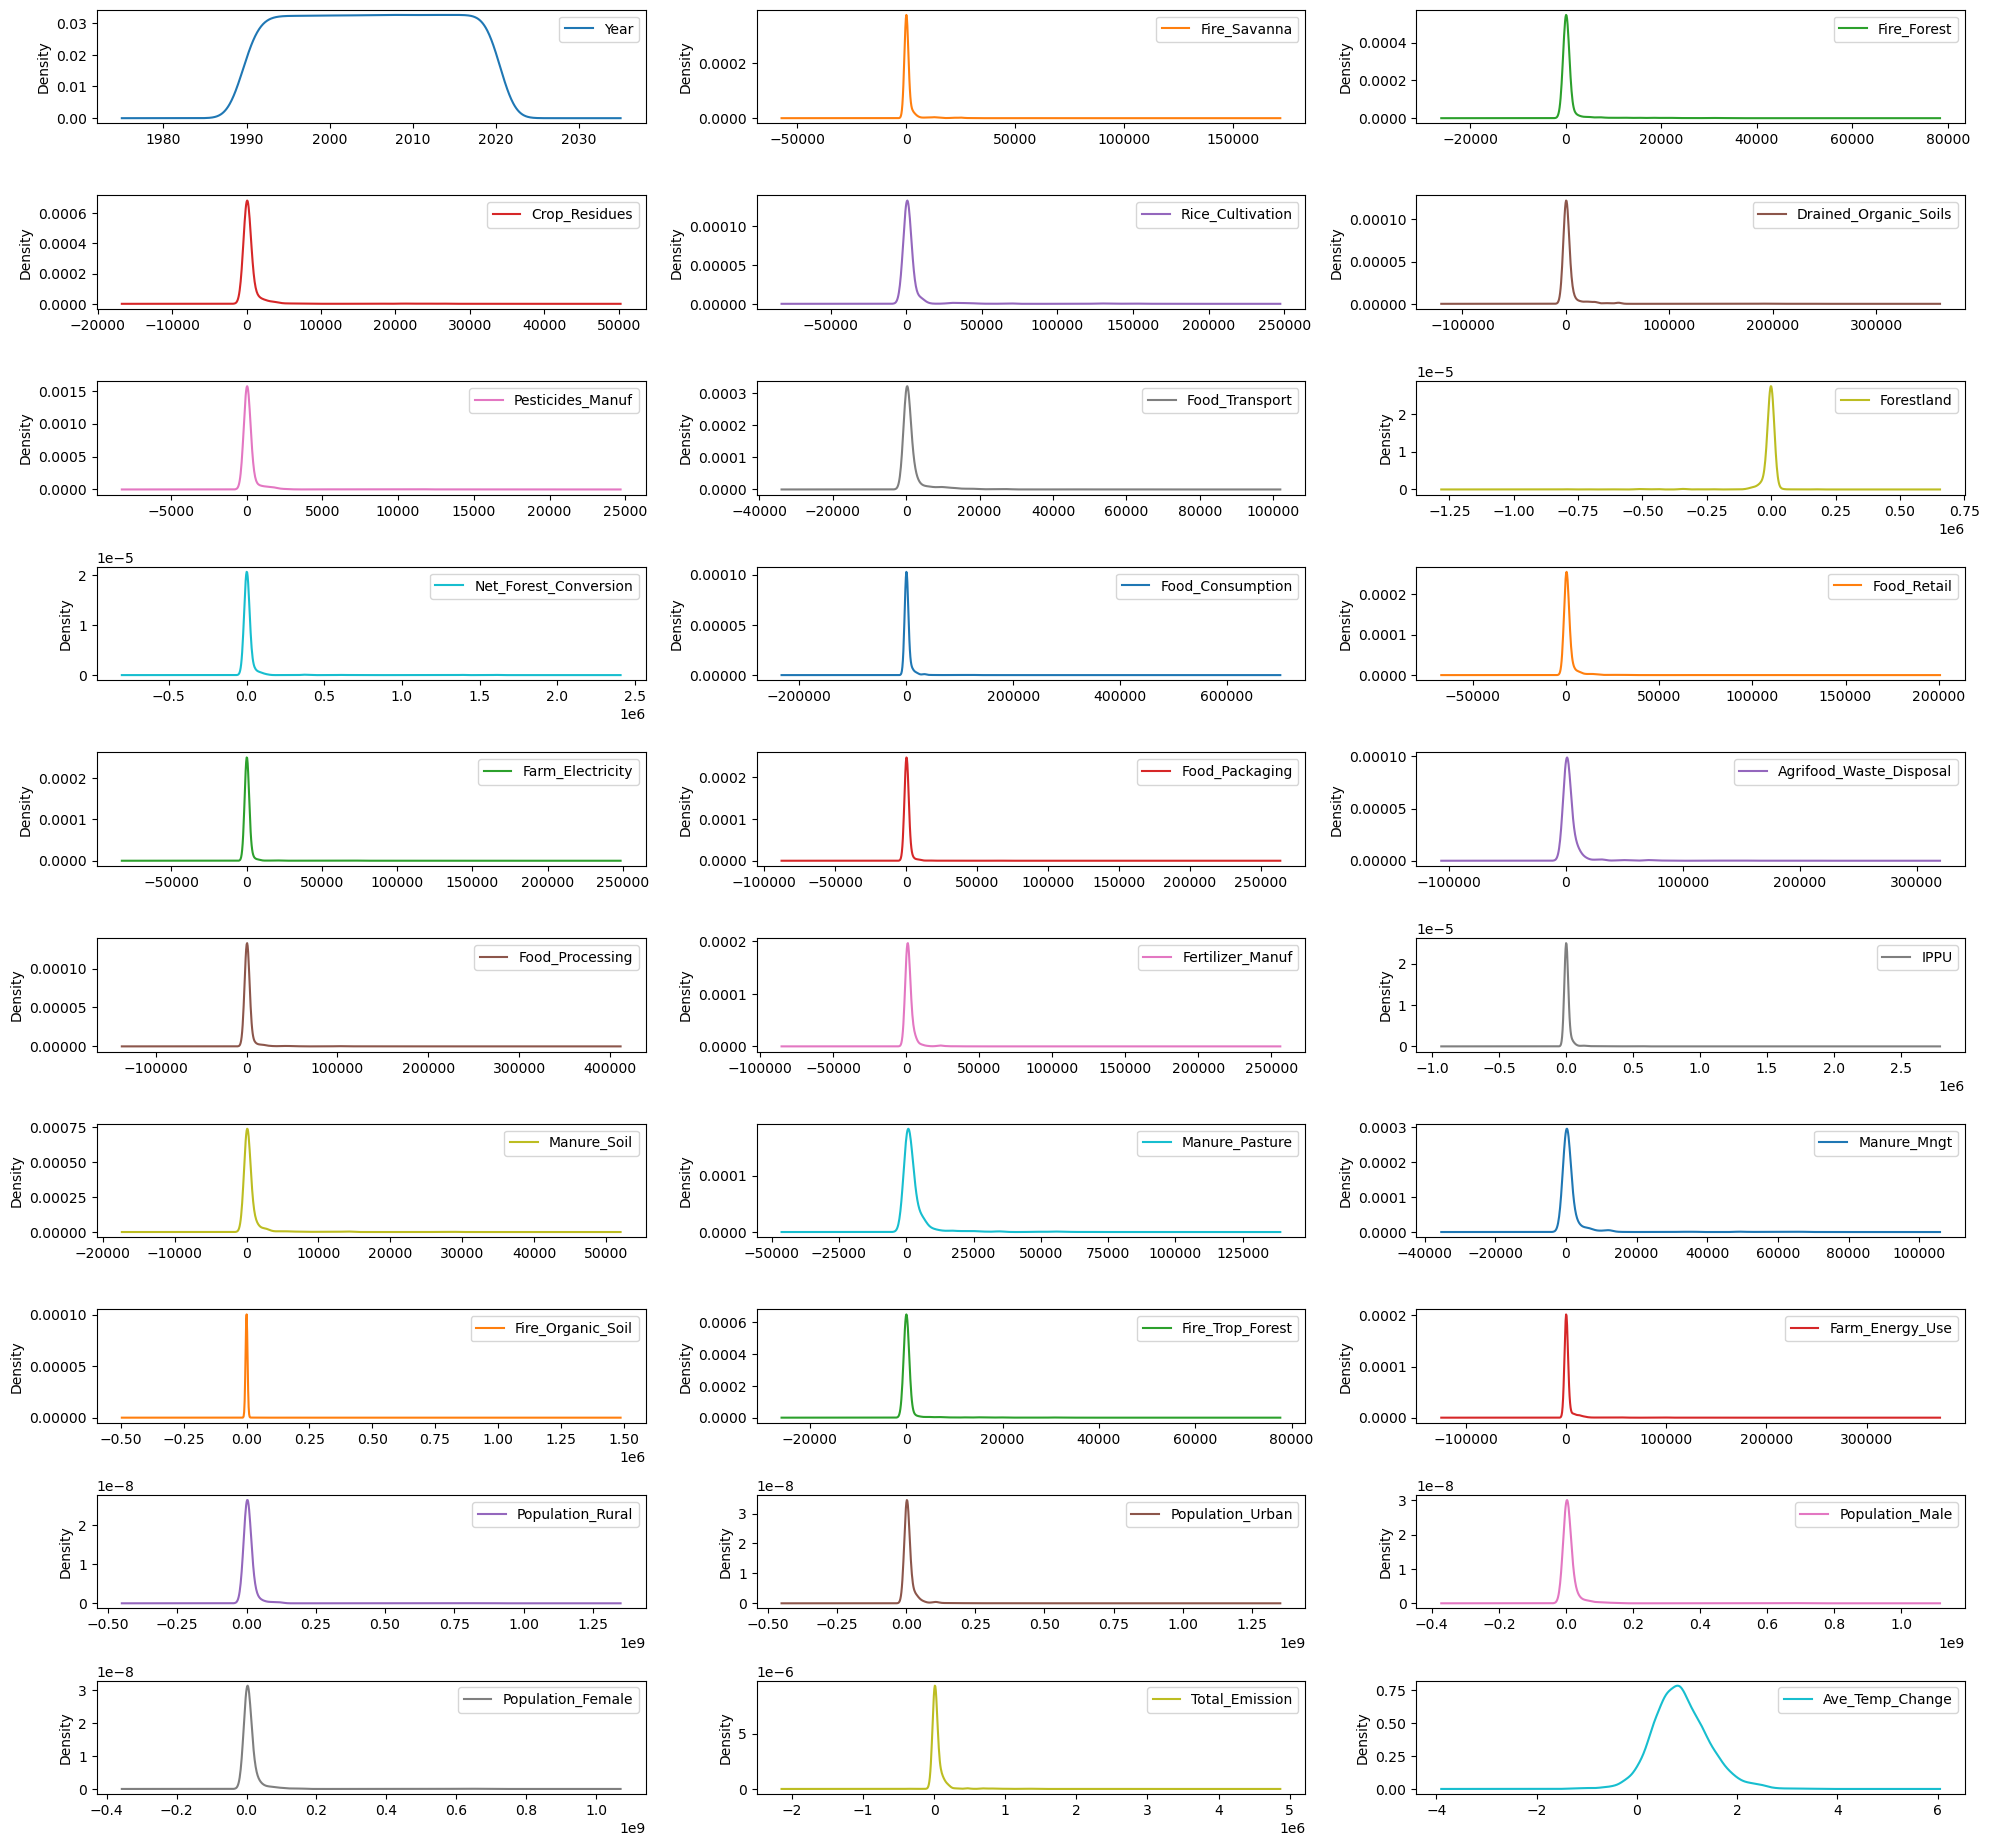

In [26]:
#plot a density plot for all features
filtered_data.plot(kind='density', subplots=True, layout=(11, 3), sharex=False, figsize=(20, 20))
# Automatically adjust subplot parameters to avoid overlap
plt.tight_layout()

Have a look at the correlation coefficients of the various features with the average temperature change, as display a heatmap.

In [27]:
# Calculating the correlation coefficients
filtered_data_numeric = filtered_data.select_dtypes(include=['number'])
correlation_matrix_filtered = filtered_data_numeric.corr()
correlation_with_target_filtered = correlation_matrix_filtered['Ave_Temp_Change'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlation of features with Average Temperature Change:\n", correlation_with_target_filtered)

Correlation of features with Average Temperature Change:
 Ave_Temp_Change            1.000000
Year                       0.544882
Food_Transport             0.072194
Food_Retail                0.069021
IPPU                       0.058539
Food_Processing            0.053068
Food_Consumption           0.050531
Manure_Soil                0.040167
Fertilizer_Manuf           0.036350
Farm_Energy_Use            0.035574
Food_Packaging             0.033886
Manure_Mngt                0.029913
Population_Urban           0.028320
Drained_Organic_Soils      0.028265
Pesticides_Manuf           0.021999
Crop_Residues              0.019573
Total_Emission             0.005574
Farm_Electricity           0.000269
Agrifood_Waste_Disposal   -0.000354
Population_Female         -0.004571
Population_Male           -0.006802
Fire_Organic_Soil         -0.024066
Manure_Pasture            -0.024739
Net_Forest_Conversion     -0.028110
Population_Rural          -0.030087
Rice_Cultivation          -0.035987
Fire_T

**Results:** the correlations between the various features and the target variable ar very weak.

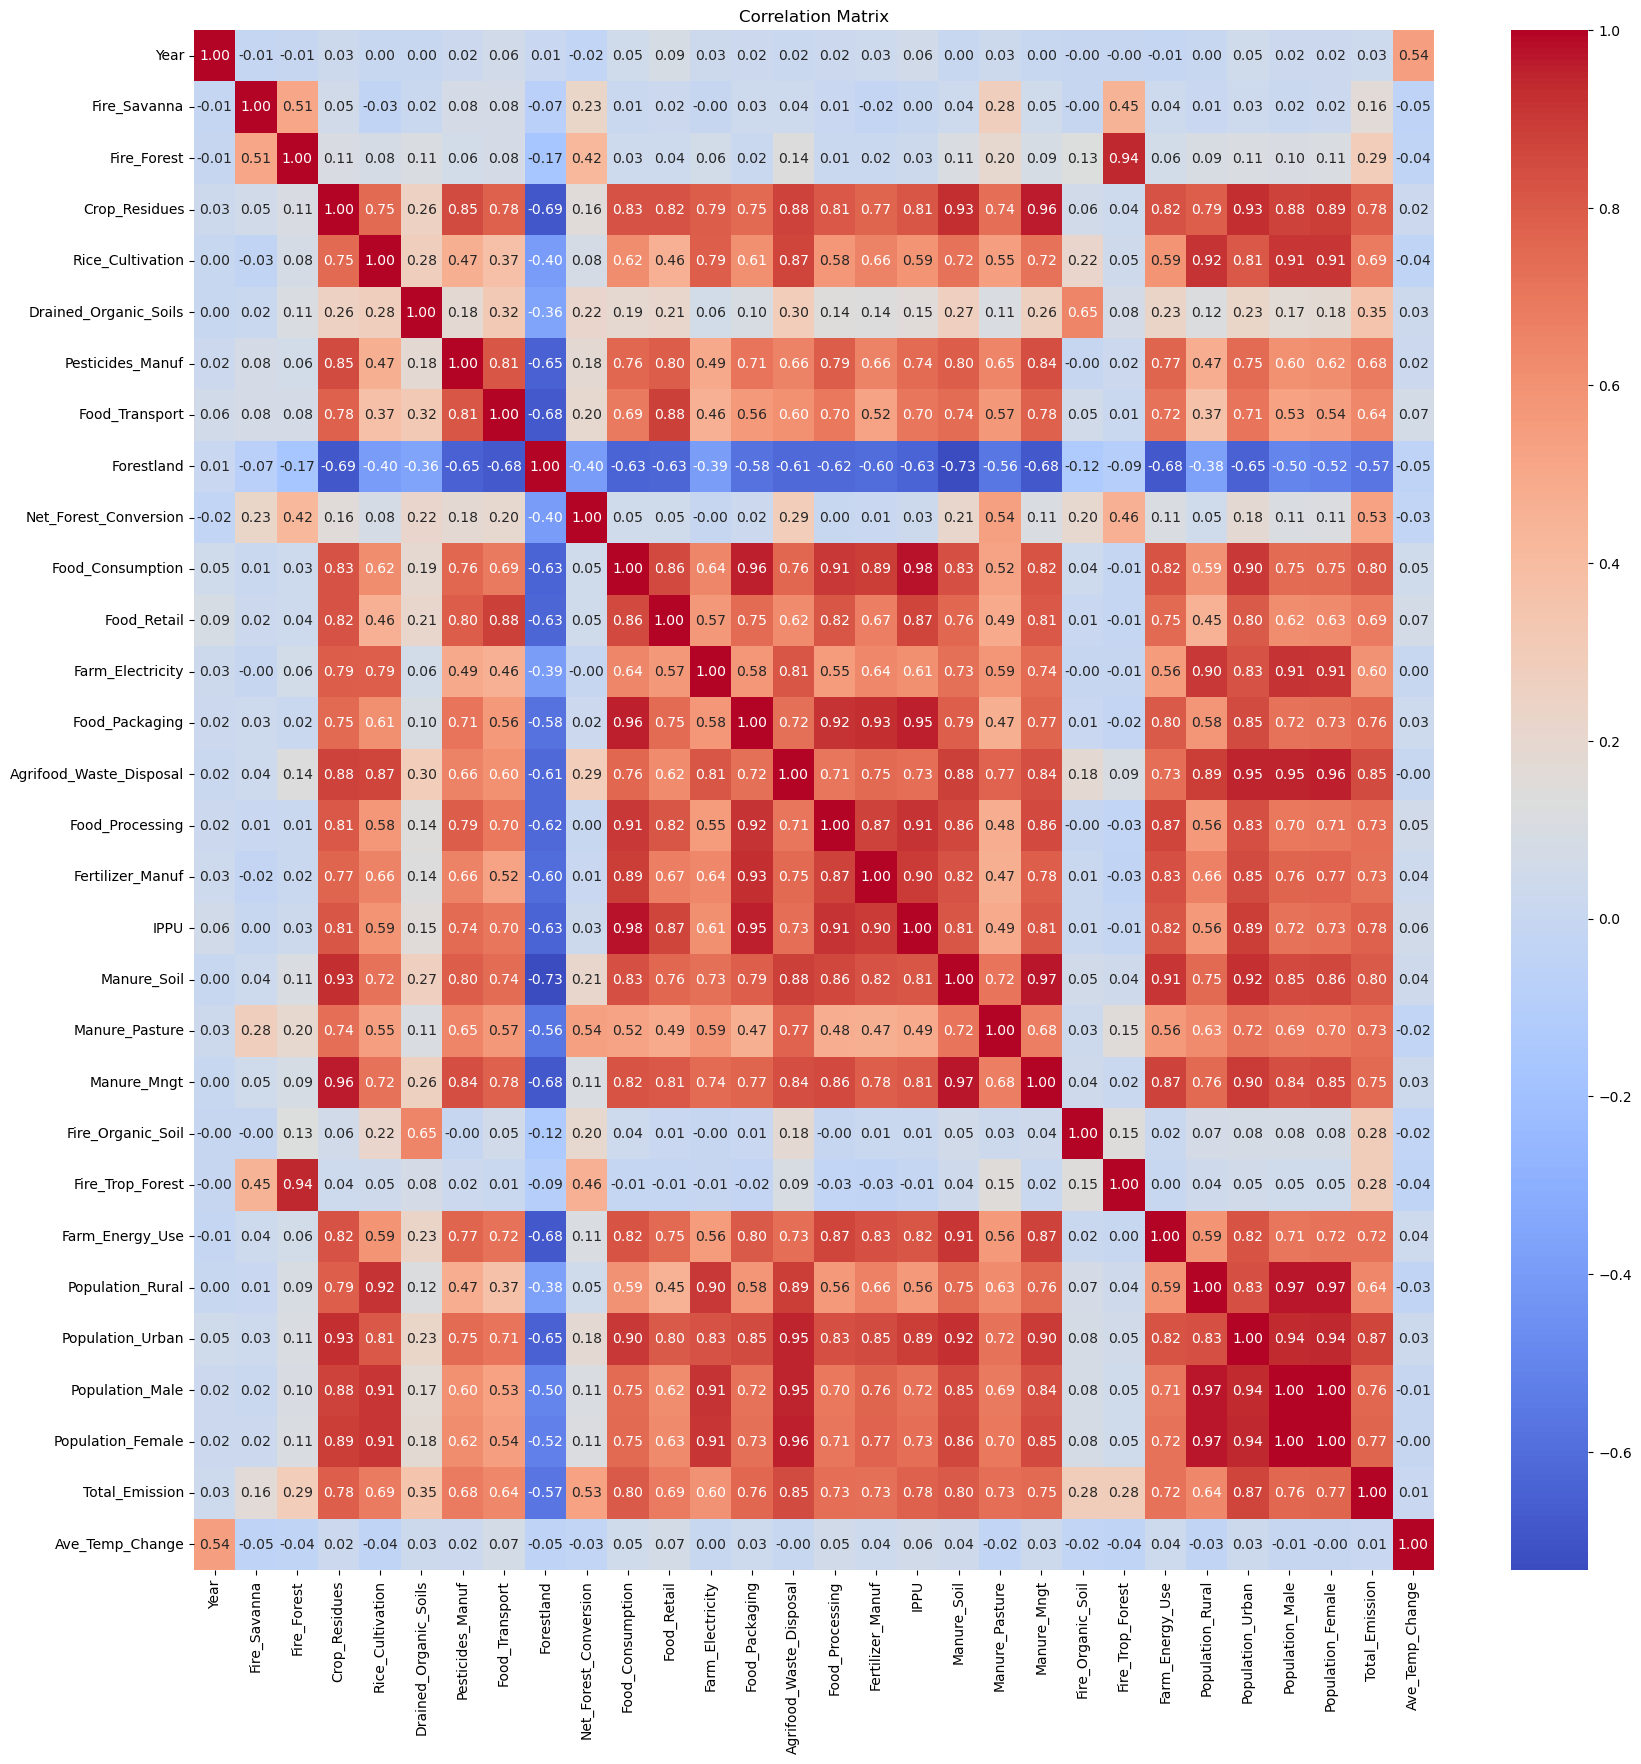

In [28]:
# Heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

There appear to be multi-colinearity between features, but the correlations of features (emission sources) with average temperature change is very low, and doubtful if they can be used to predict changes in temperature.

---
<a href=#five></a>
## **Exploratory Data Analysis on "group_by_region" dataframe**
<a href=#cont>Back to Table of Contents</a>

In [29]:
group_by_region.shape

(680, 31)

In [33]:
#Describe the group by region dataset
group_by_region.describe().T.round(0).applymap(lambda x: f"{int(x):,}" if isinstance(x, (int, float)) else x)

C:\Users\F4688813\AppData\Local\Temp\ipykernel_19972\3099744077.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_by_region.describe().T.round(0).applymap(lambda x: f"{int(x):,}" if isinstance(x, (int, float)) else x)


,count,mean,std,min,25%,50%,75%,max
Year,680,"2,005",9,"1,990","1,997","2,005","2,013","2,020"
Fire_Savanna,680,"12,103","21,051",0,80,"1,359","16,589","114,617"
Fire_Forest,680,"9,252","18,336",0,29,"1,004","7,213","80,301"
Crop_Residues,680,"6,945","9,242",0,788,"2,663","10,172","34,760"
Rice_Cultivation,680,"36,760","64,505",274,"2,310","12,396","28,162","255,632"
Drained_Organic_Soils,680,"35,709","60,993",0,880,"5,714","36,334","292,028"
Pesticides_Manuf,680,"2,927","4,222",21,441,"1,133","2,966","18,458"
Food_Transport,680,"18,635","19,552",146,"3,044","13,296","25,515","88,306"
Forestland,680,"-149,069","250,643","-1,156,312","-164,895","-18,488","-2,061","61,454"
Net_Forest_Conversion,680,"167,564","400,450",0,"1,480","22,328","110,516","2,134,405"


In [30]:
#Calculate the skewness of the group by region dataset
group_by_region.skew(numeric_only=True) 

Year                      -0.001675
Fire_Savanna               2.113543
Fire_Forest                2.433884
Crop_Residues              1.492800
Rice_Cultivation           2.159310
Drained_Organic_Soils      2.436121
Pesticides_Manuf           2.125773
Food_Transport             1.499290
Forestland                -1.932232
Net_Forest_Conversion      3.595914
Food_Consumption           4.120270
Food_Retail                3.060314
Farm_Electricity           3.612527
Food_Packaging             4.684984
Agrifood_Waste_Disposal    1.719018
Food_Processing            3.082838
Fertilizer_Manuf           3.141520
IPPU                       4.362923
Manure_Soil                1.404678
Manure_Pasture             1.935254
Manure_Mngt                1.304201
Fire_Organic_Soil          7.886012
Fire_Trop_Forest           2.950896
Farm_Energy_Use            3.052856
Population_Rural           2.662612
Population_Urban           2.466219
Population_Male            2.451777
Population_Female          2

**Results:**  the data is still skewed but less so than before aggregating by region.

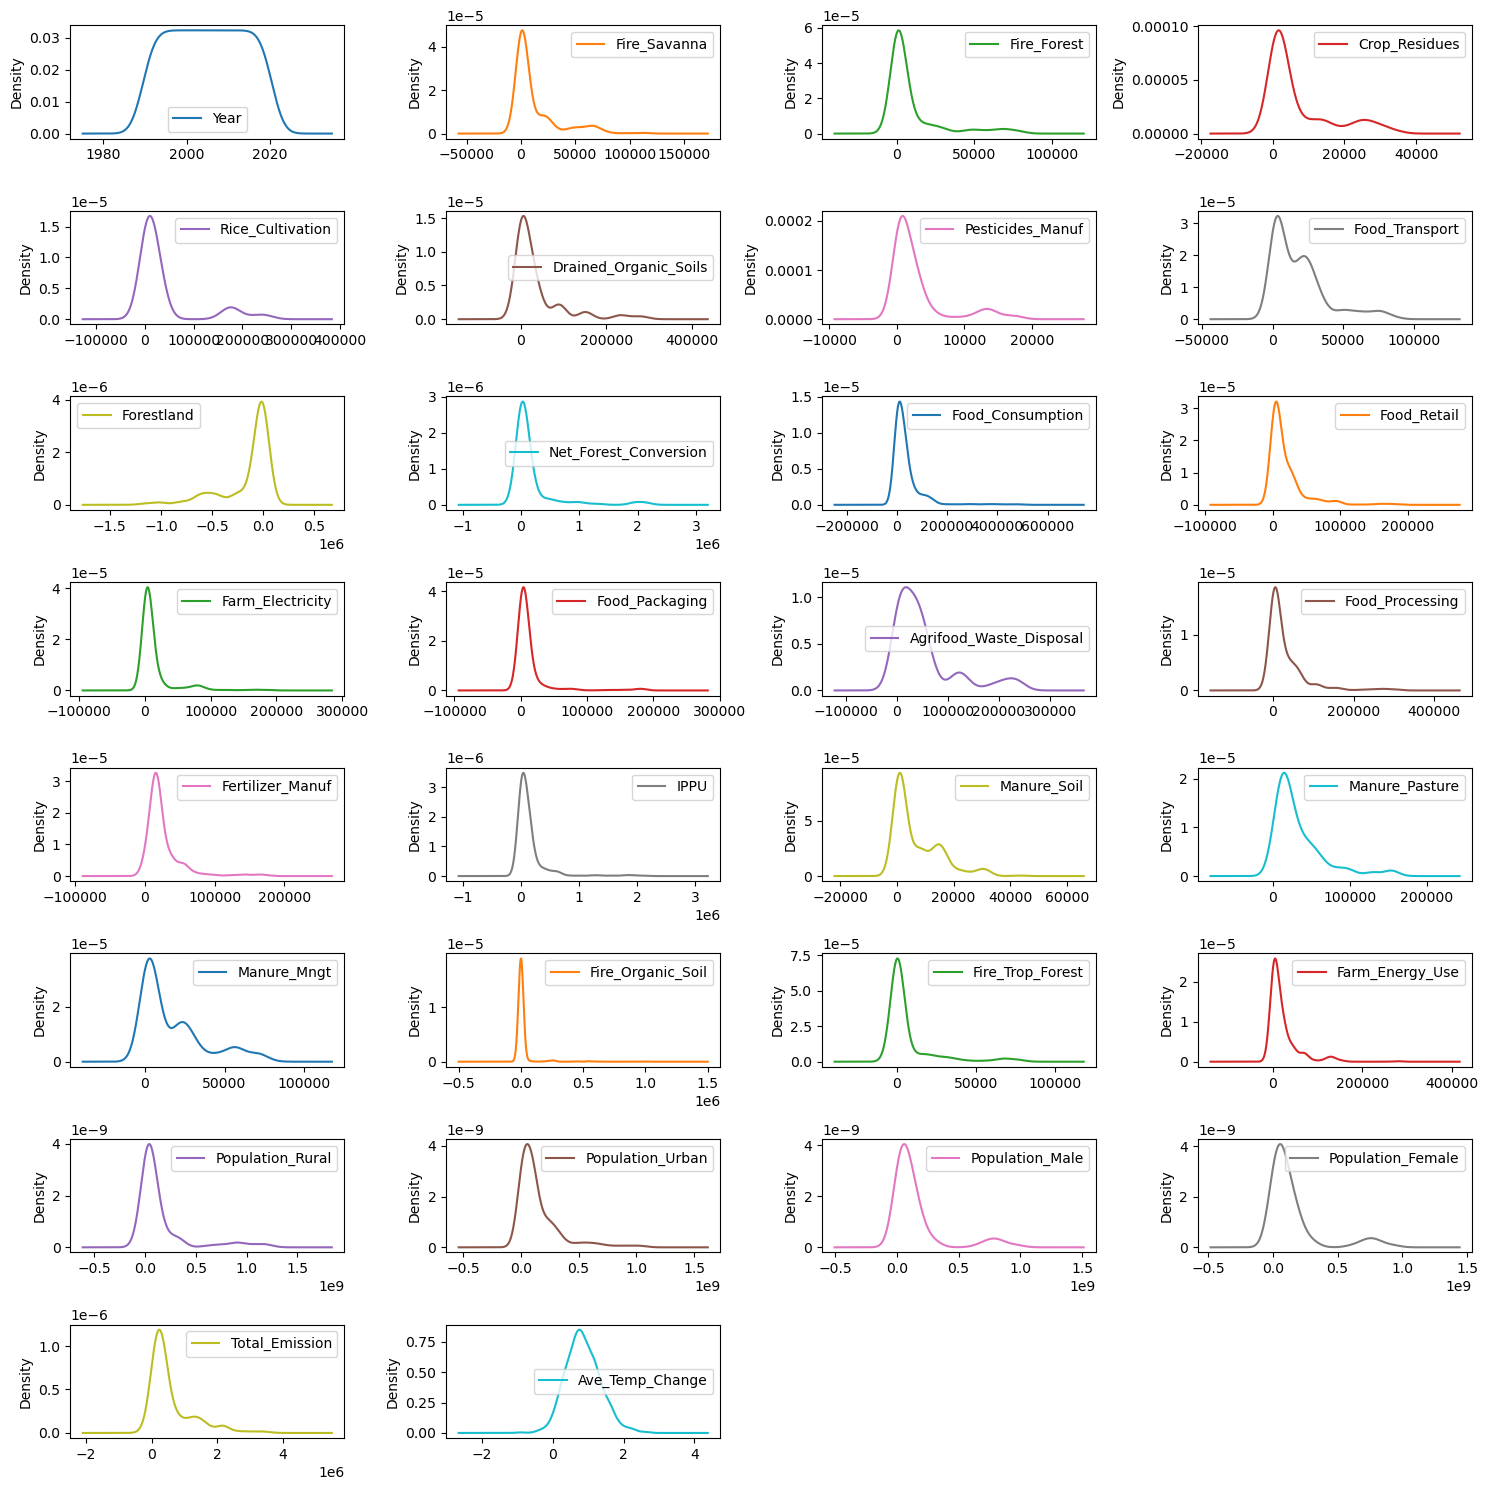

In [31]:
#display density plots for the group by region dataset
group_by_region.plot(kind='density', subplots=True, layout=(8, 4), sharex=False, figsize=(15, 15))
plt.tight_layout()

There is more variability in the density plots

In [32]:
# Calculating the correlation coefficients
correlation_matrix_region = group_by_region_numeric.corr()
correlation_with_target_region = correlation_matrix_region['Ave_Temp_Change'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlation of features with Average Temperature Change:\n", correlation_with_target_region)

Correlation of features with Average Temperature Change:
 Ave_Temp_Change            1.000000
Year                       0.617940
Food_Retail                0.267354
Food_Transport             0.227831
IPPU                       0.203065
Food_Consumption           0.191046
Food_Processing            0.183465
Fertilizer_Manuf           0.148484
Manure_Soil                0.145472
Population_Urban           0.143665
Manure_Mngt                0.128061
Food_Packaging             0.116701
Crop_Residues              0.107912
Drained_Organic_Soils      0.107644
Farm_Energy_Use            0.095058
Pesticides_Manuf           0.089503
Population_Female          0.060709
Agrifood_Waste_Disposal    0.056331
Population_Male            0.054040
Total_Emission             0.052772
Farm_Electricity           0.042729
Rice_Cultivation          -0.010696
Population_Rural          -0.013133
Fire_Organic_Soil         -0.023512
Manure_Pasture            -0.036517
Fire_Trop_Forest          -0.075469
Fire_F

There is still weak correlation between the features and Average Temperature Change, however better than before.

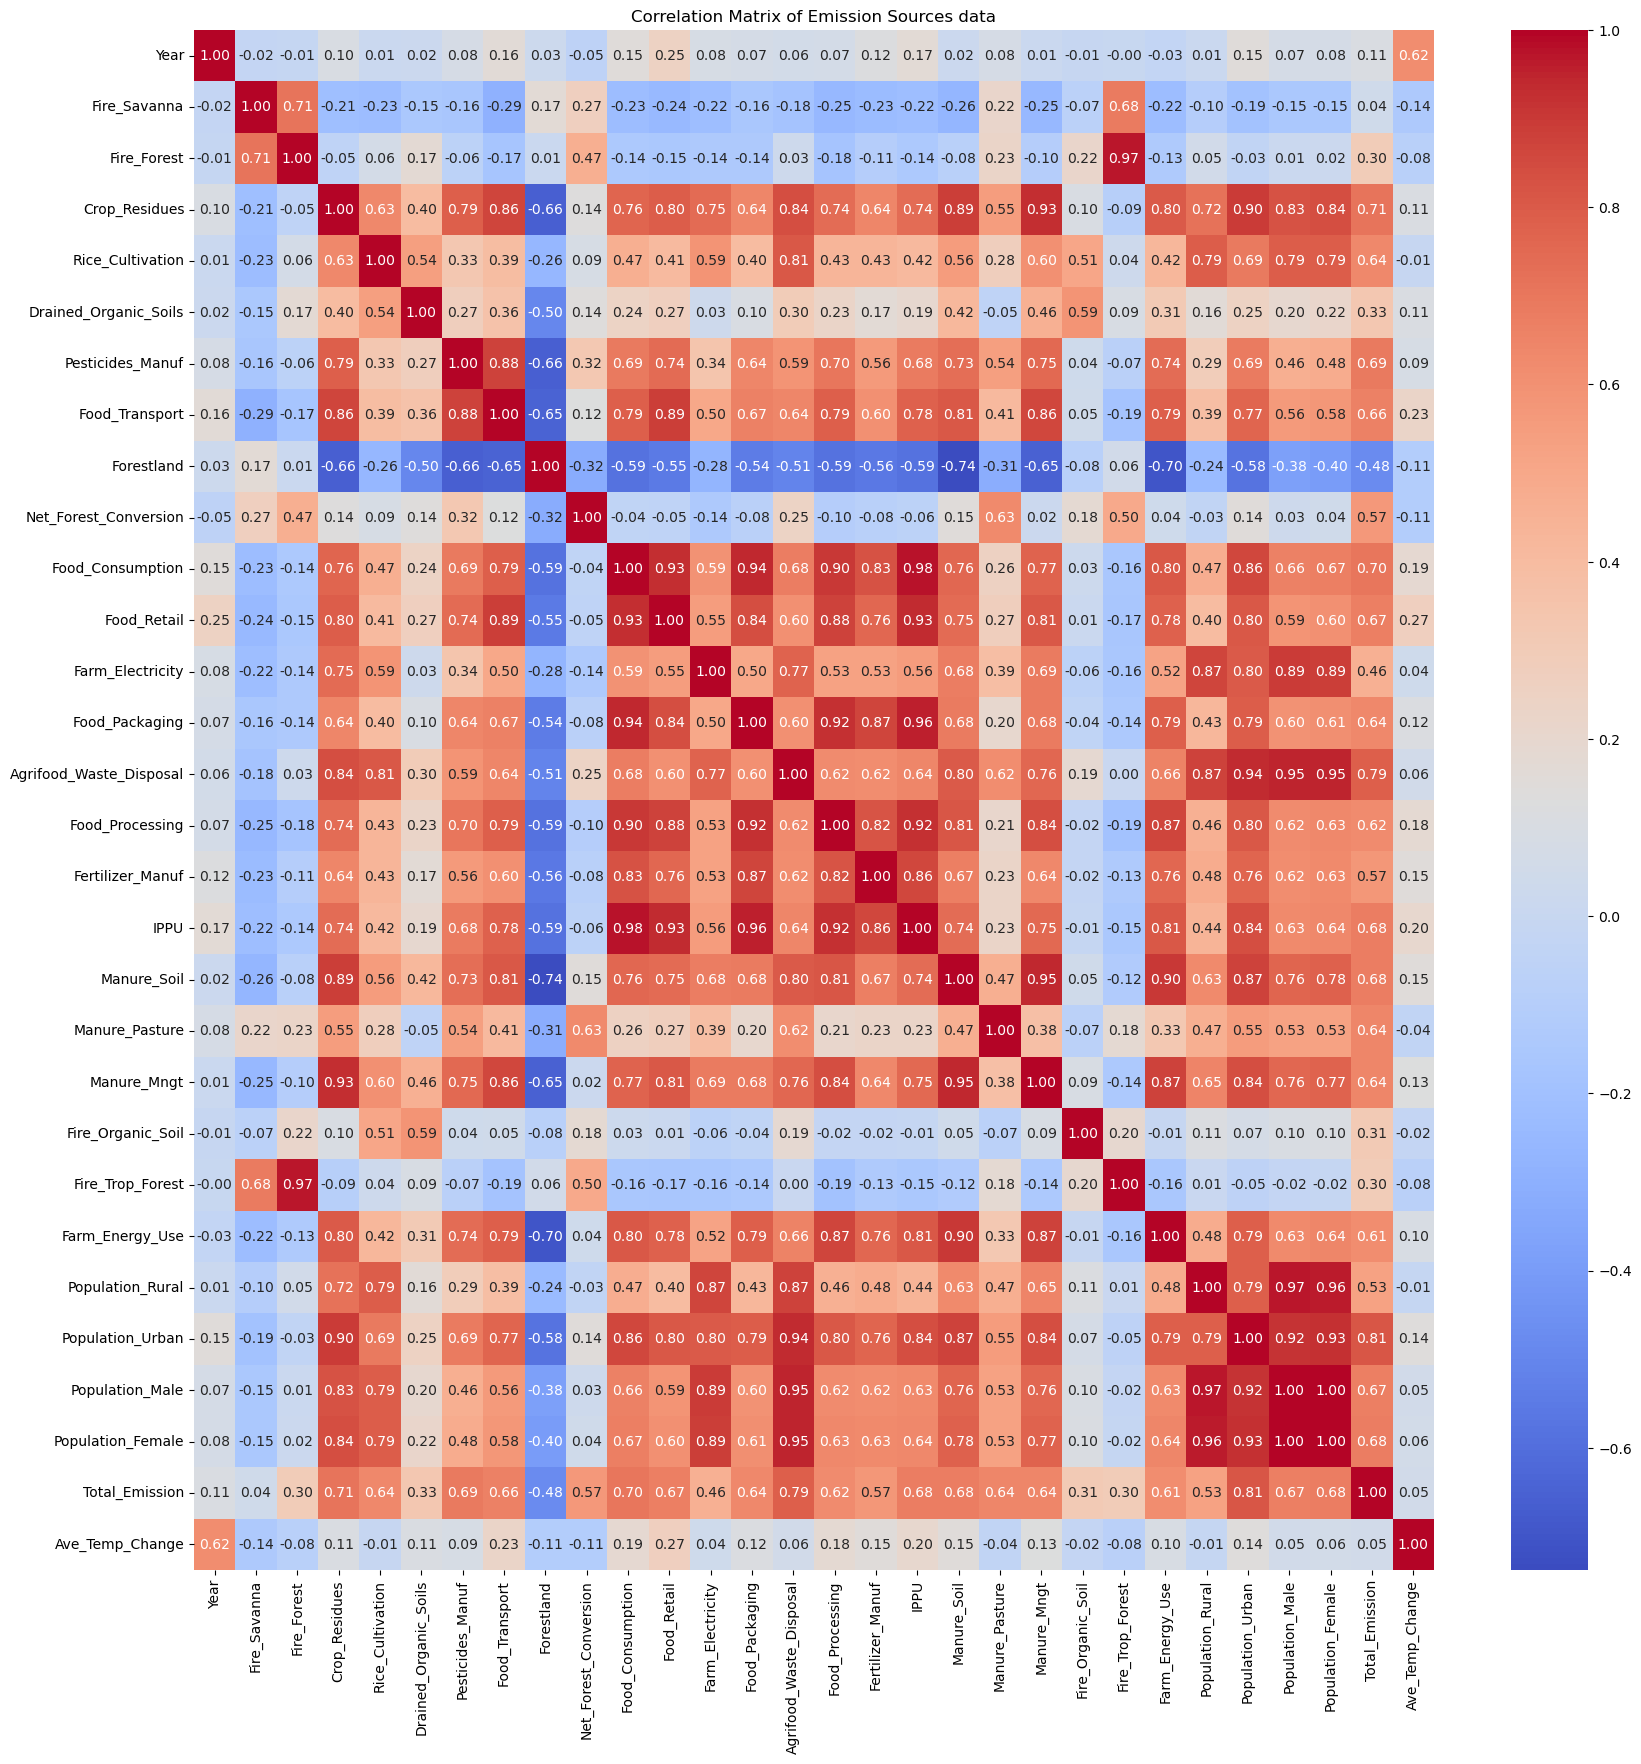

In [33]:
# Heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_region, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Emission Sources data')
plt.show()

Still much multi-colinearity between features

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

It was decided to drop the year & total emission features from the dataset.  From external analysis we know that emission levels have increased over time and that the Average Temperature Change has been becoming greater with time, however we don't want time to be the predicting factor of change.  We are trying to find the emission sources that are contributing most to Average Temperature change so that we can effect future environmental policy.  Total Emission is the total of all the emission sources and is not going to tell us either which source contribute to temperature change.

Prepare the datasets by dropping the Average Temperature Change, Year and Total Emission columns for the X values.  Y values are the Average Temperature change.  The X values are then scaled using StandardScaler because the scales of the various featueres are vastly different.  This allows for equal weighting between features in the models.  When we standardize the data, all features have a mean of 0 and a standard deviation of 1.  The model is able to treat each feature with the same importance, leading to balanced performance.  Lasso regression penalises large coefficients, so standardising means that all features are penalised equally.

Preparing the Filtered Data dataset:

In [34]:
# Separate the feature and target variables for the "filtered data numeric"  dataset and drop the Year and Total Emmision columns.
X_values_filtered = filtered_data_numeric.drop(['Ave_Temp_Change','Year','Total_Emission'], axis=1)
y_filtered = filtered_data_numeric['Ave_Temp_Change']
#scale the data relating to the features so that they are comparable
scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_values_filtered)
#display what the scaled data looks like
scaled_features_filtered_df = pd.DataFrame(X_scaled_filtered, columns=X_values_filtered.columns)
print(scaled_features_filtered_df.head())

   Fire_Savanna  Fire_Forest  Crop_Residues  Rice_Cultivation  \
0     -0.225075    -0.246655      -0.170443         -0.199631   
1     -0.225075    -0.246655      -0.169075         -0.200159   
2     -0.225075    -0.246655      -0.173634         -0.199631   
3     -0.225075    -0.246655      -0.161579         -0.199631   
4     -0.225075    -0.246655      -0.157630         -0.198313   

   Drained_Organic_Soils  Pesticides_Manuf  Food_Transport  Forestland  \
0              -0.221868         -0.221982       -0.327962    0.169549   
1              -0.221868         -0.222057       -0.328310    0.169549   
2              -0.221868         -0.222057       -0.329758    0.169549   
3              -0.221868         -0.222057       -0.329566    0.169549   
4              -0.221868         -0.222057       -0.329635    0.169549   

   Net_Forest_Conversion  Food_Consumption  ...  Manure_Soil  Manure_Pasture  \
0              -0.169158         -0.179948  ...    -0.173399       -0.204988   
1   

Preparing the grouped by region dataset:

In [35]:
# Separate the feature and target variables for the "group_by_region" dataset
X_values_region = group_by_region_numeric.drop(['Ave_Temp_Change','Year','Total_Emission'], axis=1)
y_region = group_by_region_numeric['Ave_Temp_Change']
#scale the data relating to the features so that they are comparable
scaler = StandardScaler()
X_scaled_region = scaler.fit_transform(X_values_region)
#display what the scaled data looks like
scaled_features_region_df = pd.DataFrame(X_scaled_region, columns=X_values_region.columns)
print(scaled_features_region_df.head())

   Fire_Savanna  Fire_Forest  Crop_Residues  Rice_Cultivation  \
0      2.004672    -0.273383      -0.572092         -0.547386   
1     -0.571925    -0.498390      -0.740015         -0.110469   
2     -0.519588    -0.310809      -0.558821         -0.562672   
3      1.649587     2.013299      -0.563151         -0.336304   
4     -0.536872    -0.443659       2.031723          2.340236   

   Drained_Organic_Soils  Pesticides_Manuf  Food_Transport  Forestland  \
0              -0.499851         -0.482309       -0.555712    0.440444   
1              -0.580734         -0.527263       -0.752851    0.516424   
2              -0.569478         -0.461213       -0.420429    0.586955   
3               0.076151         -0.636813       -0.890460    0.559633   
4              -0.069420          1.291611        1.270337   -1.314990   

   Net_Forest_Conversion  Food_Consumption  ...  Manure_Soil  Manure_Pasture  \
0              -0.269870         -0.450617  ...    -0.712909        0.344971   
1   

Preparing the aggregated dataset:

In [36]:
# Separate the feature and target variables for the "aggregate" dataset
df_aggregate_num = df_aggregate.select_dtypes(include=['number'])
X_values_agg = df_aggregate_num.drop(['Ave_Temp_Change','Year','Total_Emission'], axis=1)
y_agg = df_aggregate_num['Ave_Temp_Change']
#scale the data relating to the features so that they are comparable
scaler = StandardScaler()
X_scaled_agg = scaler.fit_transform(X_values_agg)

scaled_features_agg_df = pd.DataFrame(X_scaled_agg, columns=X_values_agg.columns)
print(scaled_features_agg_df.head())

   Rice_Cultivation  Drained_Organic_Soils      IPPU  Population_Rural  \
0         -0.199631              -0.221868 -0.170841         -0.068447   
1         -0.200159              -0.221868 -0.170754         -0.060776   
2         -0.199631              -0.221868 -0.170691         -0.050574   
3         -0.199631              -0.221868 -0.170950         -0.039074   
4         -0.198313              -0.221868 -0.171184         -0.027980   

   Population_Urban   Forests    Fires  Farming_Other    Manure      Food  \
0         -0.223678 -0.043745 -0.15405      -0.218389 -0.224587 -0.219202   
1         -0.220507 -0.043745 -0.15405      -0.218341 -0.218387 -0.219057   
2         -0.216338 -0.043745 -0.15405      -0.219113 -0.218435 -0.219015   
3         -0.211627 -0.043745 -0.15405      -0.217370 -0.219093 -0.219891   
4         -0.207025 -0.043745 -0.15405      -0.216830 -0.214826 -0.219617   

   Population_Total  
0         -0.138752  
1         -0.132700  
2         -0.124673  
3   

Preparing the grouped by year dataset:

In [41]:
# Separate the feature and target variables for the "group_by_year" dataset
X_values_year = group_by_year.drop(['Ave_Temp_Change','Year','Total_Emission'], axis=1)
y_year = group_by_year['Ave_Temp_Change']

scaler = StandardScaler()
X_scaled_year = scaler.fit_transform(X_values_year)

scaled_features_year_df = pd.DataFrame(X_scaled_year, columns=X_values_year.columns)
print(scaled_features_year_df.head())

   Fire_Savanna  Fire_Forest  Crop_Residues  Rice_Cultivation  \
0     -0.008512     0.002858      -1.085877         -1.772181   
1     -0.008512     0.002858      -1.282835         -1.635649   
2     -0.008512     0.002858      -1.066677         -1.148261   
3     -0.008512     0.002858      -1.203697         -1.430808   
4     -0.008512     0.002858      -1.098107         -1.237581   

   Drained_Organic_Soils  Pesticides_Manuf  Food_Transport  Forestland  \
0              -1.274284         -1.836843       -1.448119   -0.410476   
1              -1.274284         -1.896237       -1.342641   -0.410476   
2              -1.274284         -1.560191       -1.309100   -0.410476   
3              -1.258280         -1.604836       -1.312992   -0.410476   
4              -1.270505         -1.176225       -1.279453   -0.410476   

   Net_Forest_Conversion  Food_Consumption  ...  Manure_Soil  Manure_Pasture  \
0               1.140219         -1.588423  ...     0.527048       -1.596613   
1   

Split the various datasets into training and testing data, using a random state of 42.  The testing dataset size is set to 20% of the data.  By setting a constant random state between the datasets, it ensures that the random number generator produces the same sequence of random numbers each time the code is run, resulting in: (a)The same training-test splits, (b) The same initialization of weights, (c) The same shuffling of data.

This guarantees that every time we run the code (on the same data and environment), we get identical results. Without a constant random_state, every run would generate different results, making it harder to compare models or debug code.

In [37]:
# Split the data for the filtered dataset
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_scaled_filtered, y_filtered, test_size=0.2, random_state=42)

In [38]:
# Split the data for the data summarised by region
X_train_region, X_test_region, y_train_region, y_test_region = train_test_split(X_scaled_region, y_region, test_size=0.2, random_state=42)

In [39]:
# Split the data for the data aggregated
X_train_agg, X_test_agg, y_train_agg, y_test_agg = train_test_split(X_scaled_agg, y_agg, test_size=0.2, random_state=42)

In [42]:
# Split the data for the group by year dataset
X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X_scaled_year, y_year, test_size=0.2, random_state=42)

Model the various datasets, using various regression model methods.  

**Multiple Linear Regression:**  Allows one to account for and model the relationship between a target variable and multiple independent variables simultaneously. Good starting point in the analysis of a dataset.  (The coefficients of the variables can be extracted)

**Lasso:**  This method is useful when there are a large number of features, (as in this case), and it helps to improve the model’s performance by using automatic feature selection. An advantage of Lasso is that by using L1 regularization, it sets the coefficients of some features exactly to zero. This effectively eliminates those features from the model, making Lasso a sparse model.  Lasso can also handle multicollinearity more effectively, which we also have in this dataset.  L1 penalty shrinks the coefficients of correlated variables.  It results in a more stable and interpretable model.

**Decision Tree:**  This model is intuitive and easy to interpret. The structure of the tree is similar to how humans make decisions: based on a series of questions that lead to a final decision.  It can handle non-linear relationships between features and the target variable and provide useful insights into the importance of different features. They automatically determine which features contribute the most to predicting the target variable. Decision Trees are able to model interactions between features. When data has interactions (i.e., the effect of one feature depends on the value of another feature), a Decision Tree can automatically learn those relationships by making splits on different features.

**Random Forest:**  This method uses multiple decision trees and returns the mean of the outputs. One of the main advantages of Random Forests over a single Decision Tree is that it helps to reduce overfitting. A single decision tree is prone to overfitting, especially when it becomes too deep. Random Forests overcome this problem by averaging multiple decision trees, which helps to generalize better to new, unseen data.  Random Forests use bagging, where each individual tree is trained on a random subset of the data (with replacement). This introduces diversity in the trees, making the ensemble more robust and less prone to noise.  For each tree, only a random subset of features is considered for splitting at each node. This randomness helps create a diverse set of trees, each capturing different patterns in the data.  By taking the average of all predictions the variance in the final model is reduced, which make it less sensitive to noise.  They are good at identifying the most important features in the model.

For evaluation we decided to use the R-Squared value, Mean Squared Error and Root Mean Squared Error and Mean Absolute Value.  These metrics help assess how well the model fits the data and how accurate its predictions are. Each of thes emeasures have distinct advantages and provides different insights into the model's performance.

**R2:** It is the proportion of the variance in the dependent variable that is predictable from the independent variables. R² is easy to understand because it provides the percentage of the variance in the target variable is explained by the model. It gives a good sense of how well the model fits the data. A higher R² generally indicates a better fit. R² can be sensitive to outliers, which may give an inflated sense of the model's performance. While it tells you how well the model explains variance, it doesn’t give you an idea of how far off the predictions are from the actual values.

**Mean Squared Error:**  This is the average of the squared differences between the predicted and actual values.  It penalizes larger errors, but does not provide intuitive scale and is sensitive to outliers.

**Root Mean Squared Error:**  This is the square root of the Mean Squared Error. RMSE is in the same units as the target variable. It penalizes large errors more heavily due to the squaring of the differences. It gives a direct sense of how far off, on average, the model's predictions are from the actual values. It is sensitive to outliers. Doesn't differentiate between bias and variance: RMSE does not tell you whether the errors are systematic (biased) or random (variance), so it doesn’t provide much insight into the nature of the model’s errors.

**Mean Absolute Error:**  This is the average size of errors in the same units as the target variable and it gives a linear penalty to errors. That means each error is treated equally, and the MAE value reflects the average size of the error without amplifying the effect of large errors.   MAE is less sensitive to outliers compared to MSE or RMSE.


**MULTIPLE LINEAR REGRESSION (Filtered data)**

Train a multiple linear regression model on all the relevant features using the filtered data

In [43]:
# Training the model
mlr_regressor_filtered = LinearRegression()
mlr_regressor_filtered.fit(X_train_filtered, y_train_filtered)

# Making predictions on the test data
y_pred_filtered_mlr = mlr_regressor_filtered.predict(X_test_filtered)
# Evaluate the model
filtered_r2_mlr = r2_score(y_test_filtered, y_pred_filtered_mlr)
filtered_MAE_mlr = mean_absolute_error(y_test_filtered, y_pred_filtered_mlr)
filtered_MSE_mlr = mean_squared_error(y_test_filtered, y_pred_filtered_mlr)
filtered_RMSE_mlr = np.sqrt(filtered_MSE_mlr)

print(f"R-squared value on the test set: {filtered_r2_mlr}")
print(f"Mean Abosulute Error:  {filtered_MAE_mlr}")
print(f"Mean Squared Error:  {filtered_MSE_mlr}")
print(f"Root Mean Squared Error:  {filtered_RMSE_mlr}")


R-squared value on the test set: 0.02543084648110694
Mean Abosulute Error:  0.4221567657594476
Mean Squared Error:  0.2941829813938421
Root Mean Squared Error:  0.5423863764825239


**MULTIPLE LINEAR REGRESSION (Group by Region)**

Train a multiple linear regression model on all the relevant features using the grouped by region data

In [44]:
# Training the model
mlr_regressor_region = LinearRegression()
mlr_regressor_region.fit(X_train_region, y_train_region)

# Making predictions on the test data
y_pred_region_mlr = mlr_regressor_region.predict(X_test_region)
# Evaluate the model
region_r2_mlr = r2_score(y_test_region, y_pred_region_mlr)
region_MSE_mlr = mean_squared_error(y_test_region, y_pred_region_mlr)
region_RMSE_mlr = np.sqrt(region_MSE_mlr)
region_MAE_mlr = mean_absolute_error(y_test_region, y_pred_region_mlr)

print(f"R-squared value on the test set: {region_r2_mlr}")
print(f"Mean Squared Error:  {region_MSE_mlr}")
print(f"Root Mean Squared Error:  {region_RMSE_mlr}")
print(f"Mean Abosulute Error:  {region_MAE_mlr}")

R-squared value on the test set: 0.10964519704885312
Mean Squared Error:  0.18057094562869339
Root Mean Squared Error:  0.42493640186349463
Mean Abosulute Error:  0.329281839406307


**LASSO (filtered)**

Train a lasso regression model on the filtered data.  Before training the data, find the most optimal alpha value.

In [45]:
# Perform Lasso with cross-validation to automatically find the best alpha
lasso_cv = LassoCV(cv=5,max_iter=50000)  # 5-fold cross-validation
lasso_cv.fit(X_train_filtered, y_train_filtered)

# Get the best alpha value
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

# Evaluate the model on the test set
test_score = lasso_cv.score(X_test_filtered, y_test_filtered)
print(f"Test R^2 score: {test_score}")

Best alpha: 0.0006003121461296272
Test R^2 score: 0.024797445615820424


In [46]:
# Training the model
lasso_regressor_filtered = Lasso(alpha=0.0006, random_state=42)
lasso_regressor_filtered.fit(X_train_filtered, y_train_filtered)

# Evaluate the model
y_pred_lasso_filtered = lasso_regressor_filtered.predict(X_test_filtered)
r2_lasso_filtered = r2_score(y_test_filtered, y_pred_lasso_filtered)
MSE_lasso_filtered = mean_squared_error(y_test_filtered, y_pred_lasso_filtered)
RMSE_lasso_filtered = np.sqrt(MSE_lasso_filtered)
MAE_lasso_filtered = mean_absolute_error(y_test_filtered, y_pred_lasso_filtered)
features_used_filtered = np.sum(lasso_regressor_filtered.coef_ != 0)

#print(f"Optimal regularisation parameter: {lasso_regressor_filtered.alpha_}")
print(f"R-squared value on the test set: {r2_lasso_filtered}")
print(f"Mean Squared Error:  {MSE_lasso_filtered}")
print(f"Root Mean Squared Error:  {RMSE_lasso_filtered}")
print(f"Mean Absolute Error:  {MAE_lasso_filtered}")
print(f"Number of features used: {features_used_filtered}")

R-squared value on the test set: 0.0247976368573668
Mean Squared Error:  0.2943741217498512
Root Mean Squared Error:  0.5425625510020492
Mean Absolute Error:  0.4217904627872452
Number of features used: 21


**LASSO (grouped by region)**

Train a Lasso model the grouped by region data.

In [47]:
# Train LASSO regression model
lasso_regressor_region = Lasso(alpha=0.0006, random_state=42,max_iter=50000)
lasso_regressor_region.fit(X_train_region, y_train_region)

# Evaluate the model
y_pred_lasso_region = lasso_regressor_region.predict(X_test_region)
r2_lasso_region = r2_score(y_test_region, y_pred_lasso_region)
MSE_lasso_region = mean_squared_error(y_test_region, y_pred_lasso_region)
MAE_lasso_region = mean_absolute_error(y_test_region, y_pred_lasso_region)
RMSE_lasso_region = np.sqrt(MSE_lasso_region)
features_used_region = np.sum(lasso_regressor_region.coef_ != 0)

#print(f"Optimal regularisation parameter: {lasso_regressor_region.alpha_}")
print(f"R-squared value on the test set: {r2_lasso_region}")
print(f"Mean Squared Error:  {MSE_lasso_region}")
print(f"Root Mean Squared Error:  {RMSE_lasso_region}")
print(f"Mean Absolute Error:  {MAE_lasso_region}")
print(f"Number of features used: {features_used_region}")

R-squared value on the test set: 0.1042983793401937
Mean Squared Error:  0.18165532224637065
Root Mean Squared Error:  0.42621042015226546
Mean Absolute Error:  0.335665263487005
Number of features used: 26


**DECISION TREES (filtered)**

Train a decision tree on the filtered data dataset.  Because there is low correlation and high multi-colinearity, we have set the minimum samples per leaf at 5. 

In [50]:
#Train the model
dec_tree_filtered = DecisionTreeRegressor(random_state=42, splitter='random', min_samples_leaf=5)
dec_tree_filtered.fit(X_train_filtered, y_train_filtered)

# Evaluate the model
y_pred_dt_filtered = dec_tree_filtered.predict(X_test_filtered)
r2_dt_filtered = r2_score(y_test_filtered, y_pred_dt_filtered)
MSE_dt_filtered = mean_squared_error(y_test_filtered, y_pred_dt_filtered)
RMSE_dt_filtered = np.sqrt(MSE_dt_filtered)
MAE_dt_filtered = mean_absolute_error(y_test_filtered, y_pred_dt_filtered)

print(f"R-squared value on the test set: {r2_dt_filtered}")
print(f"Mean Squared Error:  {MSE_dt_filtered}")
print(f"Root Mean Squared Error:  {RMSE_dt_filtered}")
print(f"Mean Absolute Error:  {MAE_dt_filtered}")


R-squared value on the test set: 0.32229043544613944
Mean Squared Error:  0.20457308698895954
Root Mean Squared Error:  0.452297564650706
Mean Absolute Error:  0.3358083786838267


In [54]:
# Access the feature importances
feature_importances = dec_tree_filtered.feature_importances_
# Create a pandas DataFrame to make it easier to read
features = X_values_filtered.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(importance_df.head(10))

                  Feature  Importance
10            Food_Retail    0.098222
6          Food_Transport    0.068520
9        Food_Consumption    0.057148
16                   IPPU    0.055137
25        Population_Male    0.053761
24       Population_Urban    0.051406
4   Drained_Organic_Soils    0.049426
23       Population_Rural    0.048446
12         Food_Packaging    0.047247
18         Manure_Pasture    0.043515


**DECISION TREES (region)**

Train a decision tree model on the grouped by region data, using a random splitter and a minimum leaf sample size of 5, becuase of heavy multi-colinearity in the data.

In [52]:
dec_tree_region = DecisionTreeRegressor(random_state=42, splitter='random', min_samples_leaf=5)
dec_tree_region.fit(X_train_region, y_train_region)

# Evaluate the model
y_pred_dt_region = dec_tree_region.predict(X_test_region)
r2_dt_region = r2_score(y_test_region, y_pred_dt_region)
MSE_dt_region = mean_squared_error(y_test_region, y_pred_dt_region)
MAE_dt_region = mean_absolute_error(y_test_region, y_pred_dt_region)
RMSE_dt_region = np.sqrt(MSE_dt_region)

print(f"R-squared value on the test set: {r2_dt_region}")
print(f"Mean Squared Error:  {MSE_dt_region}")
print(f"Mean Squared Error:  {RMSE_dt_region}")
print(f"Mean Absolute Error:  {MAE_dt_region}")

R-squared value on the test set: 0.3229157500341717
Mean Squared Error:  0.13731800275730374
Mean Squared Error:  0.3705644380634814
Mean Absolute Error:  0.28125192251048764


In [55]:
# Access the feature importances
feature_importances_region = dec_tree_region.feature_importances_
features_region = X_values_region.columns
# Create a pandas DataFrame to make it easier to read
importance_df_region = pd.DataFrame({
    'Feature': features_region,
    'Importance': feature_importances_region
})

# Sort by importance
importance_df_region = importance_df_region.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(importance_df_region.head(10))

             Feature  Importance
2      Crop_Residues    0.178615
7         Forestland    0.155857
9   Food_Consumption    0.097266
19       Manure_Mngt    0.095838
17       Manure_Soil    0.073856
10       Food_Retail    0.071490
24  Population_Urban    0.051172
14   Food_Processing    0.047230
21  Fire_Trop_Forest    0.036880
16              IPPU    0.034639


**RANDOM FORESTS (filtered)**

Train a Random Forest model on the filtered data data

In [56]:
# Initialise the RandomForestRegressor
rf_filtered = RandomForestRegressor(random_state=42, bootstrap=True, min_samples_leaf=5)

# Fit the model
rf_filtered.fit(X_train_filtered, y_train_filtered)

# Evaluate the model
y_pred_rf_filtered = rf_filtered.predict(X_test_filtered)
r2_rf_filtered = r2_score(y_test_filtered, y_pred_rf_filtered)
MSE_rf_filtered = mean_squared_error(y_test_filtered, y_pred_rf_filtered)
MAE_rf_filtered = mean_absolute_error(y_test_filtered, y_pred_rf_filtered)
RMSE_rf_filtered = np.sqrt(MSE_rf_filtered)

print(f"R-squared value on the test set: {r2_rf_filtered}")
print(f"Mean Squared Error:  {MSE_rf_filtered}")
print(f"Root Mean Squared Error:  {RMSE_rf_filtered}")
print(f"Mean Absolute Error:  {MAE_rf_filtered}")


R-squared value on the test set: 0.4826587815854215
Mean Squared Error:  0.15616437425871504
Root Mean Squared Error:  0.39517638373100566
Mean Absolute Error:  0.2917037098002202


**RANDOM FOREST (Region)**

In [57]:
# Initialise the RandomForestRegressor
rf_region = RandomForestRegressor(random_state=42, bootstrap=True, min_samples_leaf=5)

# Fit the model
rf_region.fit(X_train_region, y_train_region)

# Evaluate the model
y_pred_rf_region = rf_region.predict(X_test_region)
r2_rf_region = r2_score(y_test_region, y_pred_rf_region)
MSE_rf_region = mean_squared_error(y_test_region, y_pred_rf_region)
MAE_rf_region = mean_absolute_error(y_test_region, y_pred_rf_region)
RMSE_rf_region = np.sqrt(MSE_rf_region)

print(f"R-squared value on the test set: {r2_rf_region}")
print(f"Mean Squared Error:  {MSE_rf_region}")
print(f"Root Mean Squared Error:  {RMSE_rf_region}")
print(f"Mean Absolute Error:  {MAE_rf_region}")

R-squared value on the test set: 0.3766394875954313
Mean Squared Error:  0.12642240690945758
Root Mean Squared Error:  0.35555928747461735
Mean Absolute Error:  0.26747651386695315


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

The random forest regression model performed the best out of the 4 models.  Interestingly the random forest model based on the filtered data presented better r2 scores, but worse RMSE scores.

Extract the coefficients of the features from the Lasso model and sort in ascending order to determine which features can be dropped andtest the smaller set on the random forest model.

In [58]:
# Extract coefficient from model and sort in ascending order
coeff_filtered = pd.DataFrame(lasso_regressor_filtered.coef_, X_values_filtered.columns, columns=['Coefficient']).sort_values('Coefficient')
coeff_filtered

,Coefficient
Farm_Energy_Use,-0.085695
Manure_Mngt,-0.081849
Population_Rural,-0.058153
Pesticides_Manuf,-0.054900
Fire_Forest,-0.034567
Food_Packaging,-0.030557
Rice_Cultivation,-0.027954
Fire_Organic_Soil,-0.025512
Net_Forest_Conversion,-0.024714
Manure_Pasture,-0.019223


In [59]:
# Separate the feature and target variables for the "filtered data numeric"  dataset
X_values_filtered_fewer = filtered_data_numeric.drop(['Ave_Temp_Change','Total_Emission', 'Year', 'Population_Male', 'Population_Female','Agrifood_Waste_Disposal',
                                                      'Food_Retail','Food_Consumption','Farm_Electricity'], axis=1)
y_filtered = filtered_data_numeric['Ave_Temp_Change']

scaler = StandardScaler()
X_scaled_filtered_fewer = scaler.fit_transform(X_values_filtered_fewer)
# Split the data for the filtered dataset
X_train_filtered_f, X_test_filtered_f, y_train_filtered_f, y_test_filtered_f = train_test_split(X_scaled_filtered_fewer, y_filtered, 
                                                                                                                test_size=0.2, random_state=42)

In [60]:
# Initialise the RandomForestRegressor
rf_filtered_f = RandomForestRegressor(random_state=42, bootstrap=True, min_samples_leaf=5)

# Fit the model
rf_filtered_f.fit(X_train_filtered_f, y_train_filtered_f)

# Evaluate the model
y_pred_rf_filtered_f = rf_filtered_f.predict(X_test_filtered_f)
r2_rf_filtered_f = r2_score(y_test_filtered_f, y_pred_rf_filtered_f)
MSE_rf_filtered_f = mean_squared_error(y_test_filtered_f, y_pred_rf_filtered_f)
RMSE_rf_filtered_f = np.sqrt(MSE_rf_filtered_f)

print(f"R-squared value on the test set: {r2_rf_filtered_f}")
print(f"Mean Squared Error:  {MSE_rf_filtered_f}")
print(f"Root Mean Squared Error:  {RMSE_rf_filtered_f}")

R-squared value on the test set: 0.46557619188696486
Mean Squared Error:  0.16132091666442777
Root Mean Squared Error:  0.4016477519723318


Filtering out features from the filtered data set and then running the random forest model again does not produce significantly better results than the random forest filtered dataset model.

We therefore stick with the random forest model based on the filtered data dataset, (original dataset less the duplicate China entries).


**Random forest filtered data evaluation**

Visualise the predicted y values (Ave_Temp_Change) vs the actual y values of the random forest on filtered data

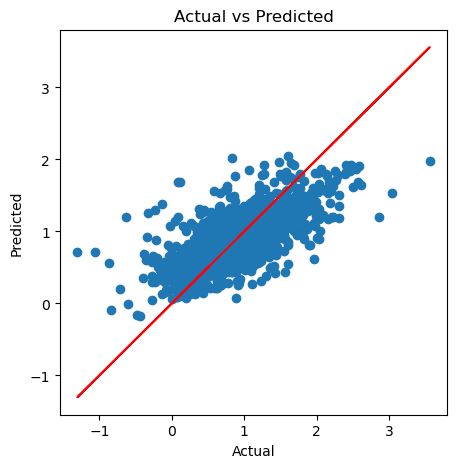

In [61]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot actual vs. predicted values on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test_filtered,y_pred_rf_filtered)
ax.plot(y_test_filtered,y_test_filtered,'r')
plt.show()

Determine the importance of each of the features in the random forest model using the filtered data dataset.  This will guide us on which emission source o focus on when determining future policies.

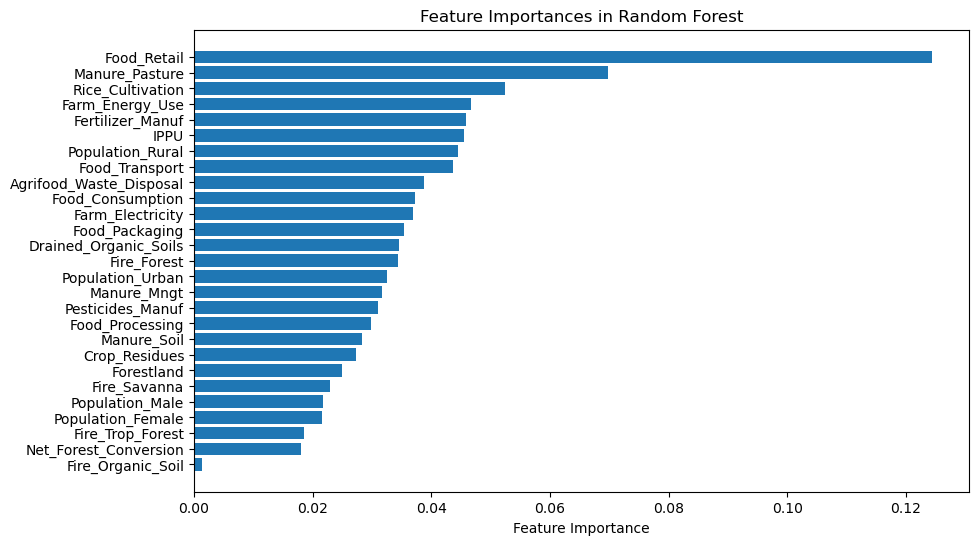

In [62]:
# Get feature importances
importances = rf_filtered.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

feature_names = X_values_filtered.columns  # Get feature names from DataFrame

# Create a bar chart with actual feature names
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances[indices], align='center')
plt.yticks(range(len(feature_names)), feature_names[indices])  # Use actual feature names
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()



Use cross validation on the model to see if the model is robust for unseen data.

Mean MSE: 0.28122528109158196
Standard Deviation of MSE: 0.04685821566730185


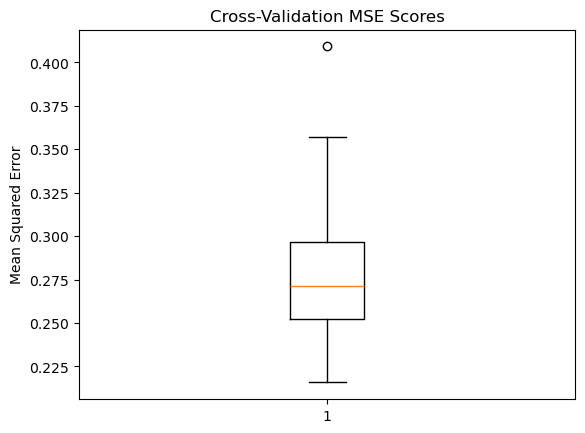

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Perform -fold cross-validation
cv_scores = cross_val_score(rf_filtered, X_values_filtered, y_filtered, cv=20, scoring='neg_mean_squared_error')

# Convert to positive MSE (since cross_val_score returns negative values for MSE)
mse_scores = -cv_scores

# Calculate mean and standard deviation
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Print results
print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

# Visualize the cross-validation results
plt.boxplot(mse_scores)
plt.title('Cross-Validation MSE Scores')
plt.ylabel('Mean Squared Error')
plt.show()



 The training MSE (0.15) is lower than the cross-validation MSE (0.28), which indicates the the model is fitting the training data very well, but not the unseen data, and that the model is overfitting.  The standard deviation of the MSE at 0.05 is low, indicating that there is little variation in the test scores.  The cross validation is consistently getting a MSE of 0.28

 **Eavluate the random forest based on region data**

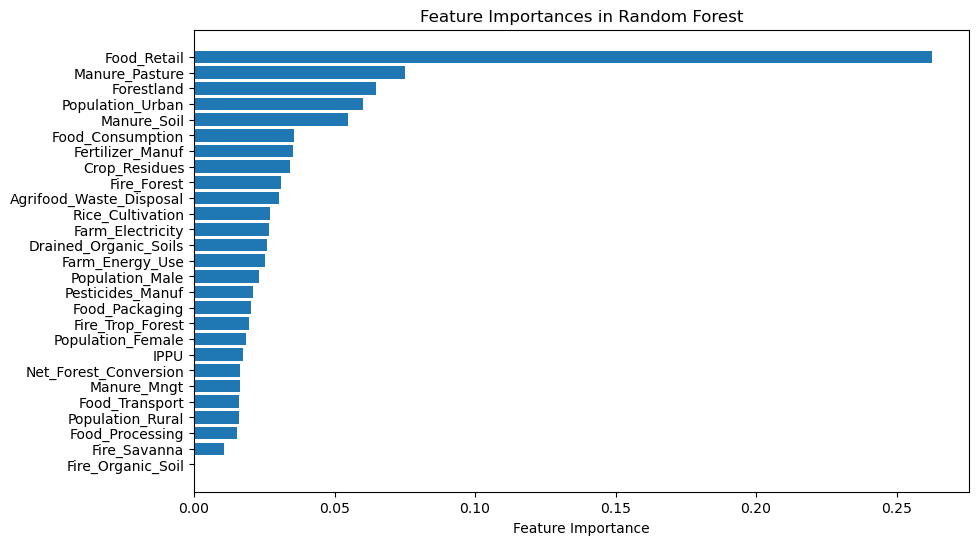

In [64]:
# Get feature importances
importances_region = rf_region.feature_importances_

# Sort features by importance
indices_region = np.argsort(importances_region)[::-1]

# Assuming your features are in a pandas DataFrame, X_train_filtered_f
feature_names = X_values_filtered.columns  # Get feature names from DataFrame

# Create a bar chart with actual feature names
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances_region[indices_region], align='center')
plt.yticks(range(len(feature_names)), feature_names[indices_region])  # Use actual feature names
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

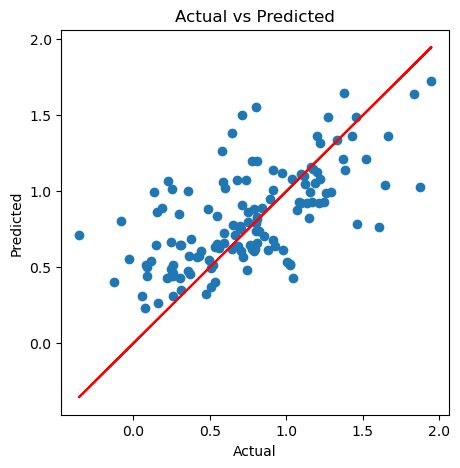

In [65]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot actual vs. predicted values on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test_region,y_pred_rf_region)
ax.plot(y_test_region,y_test_region,'r')
plt.show()

Mean MSE: 0.12473210500362616
Standard Deviation of MSE: 0.06574548223486422


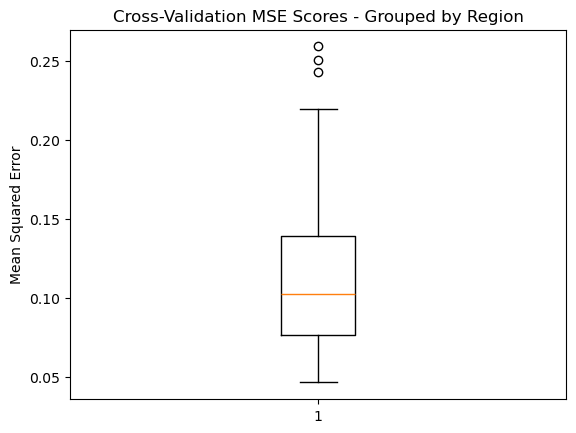

In [66]:
# Perform -fold cross-validation
cv_scores_region = cross_val_score(rf_region, X_values_region, y_region, cv=20, scoring='neg_mean_squared_error')

# Convert to positive MSE (since cross_val_score returns negative values for MSE)
mse_scores_region = -cv_scores_region

# Calculate mean and standard deviation
mean_mse_region = np.mean(mse_scores_region)
std_mse_region = np.std(mse_scores_region)

# Print results
print(f'Mean MSE: {mean_mse_region}')
print(f'Standard Deviation of MSE: {std_mse_region}')

# Visualize the cross-validation results
plt.boxplot(mse_scores_region)
plt.title('Cross-Validation MSE Scores - Grouped by Region')
plt.ylabel('Mean Squared Error')
plt.show()

 The cross-validation MSE (0.124), is virtually the same as the training MSE (0.126).  This indicates that the random forest model based on the regional summarised data performs well on unseen data.  The standard deviation from the cross validation is 0.06, indicating that the results are consistent.
 

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

The best performing model of those tested was the random forest based on the grouped by region data, with the duplicate China data removed.  By grouping the data by region it resulted in more consistent scores when doing a cross validation test.

Parameters were set as follows:  bootstrapping to true, and minimum samples per leaf of 5.  This was done because we noticed high multi-colinearity between the features.

Training data performance:  r-squared score = 0.377, mean squared error = 0.126, root mean squared error = 0.355, mean absolute error = 0.267

On cross validation the mean MSE = 0.125. which is consistent with the testing MSE of 0.126.  The standard deviation of the MSE on cross validation of 0.05 suggests consistency in the rsults of the cross validation.


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

From the findings of the model, emissions from food retail,(emissions from the operation of retail establishments selling food), is the factor that mostly affects changes in temperature.  This makes sense as especially in the developed world the output of the agri-food sector is sold in retail establishments, either grocery stores or ready made through restaurants.  As population and urban population increases, the demand for these establishments will grow.  It is important that much research and energy goes into researching sustainable and energy efficient means of retailing food.  Food retail consumes much energy in the form of electricity for cooling, lighting, running computer systems.  Perhaps it should be mandatory that these establishments consume a certain amoutn of green energy from renewable sources.

Future research may concentrate on the use of energy in the food retail sector, including food wastage to understand how it is driving CO2 emissions.


---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

- United Nations Geoscheme:  https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_the_United_Nations_geoscheme

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

* ### Appendix: 

Total Emissions trend over time

In [67]:
group_by_year.head()

,Year,Fire_Savanna,Fire_Forest,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils,Pesticides_Manuf,Food_Transport,Forestland,Net_Forest_Conversion,...,Manure_Mngt,Fire_Organic_Soil,Fire_Trop_Forest,Farm_Energy_Use,Population_Rural,Population_Urban,Population_Male,Population_Female,Total_Emission,Ave_Temp_Change
0,1990,265219.7764,203033.5448,129274.5967,763986.999421,748744.7314,49074.550375,302018.006352,-3.430992e+06,4.209701e+06,...,378860.9659,264122.169747,146382.5688,621782.7338,3.011132e+09,2.252896e+09,2.650815e+09,2.630239e+09,1.027680e+07,0.583827
1,1991,265219.7764,203033.5448,125090.1593,767251.114070,748744.7314,48585.455756,309792.682238,-3.430992e+06,4.209701e+06,...,379233.2495,264122.169747,146382.5688,638474.4798,3.041545e+09,2.308920e+09,2.695913e+09,2.673700e+09,1.041612e+07,0.311956
2,1992,265219.7764,203033.5446,129682.5013,778903.240658,748744.7313,51352.699070,312264.991286,-3.430992e+06,4.209701e+06,...,372979.2875,264122.169747,146382.5688,472433.1236,3.070030e+09,2.364699e+09,2.739080e+09,2.715468e+09,1.027601e+07,0.286647
3,1993,265219.7763,203033.5446,126771.4723,772148.301630,749178.5677,50985.061809,311978.109409,-3.430992e+06,4.209701e+06,...,370818.8110,264122.169747,146382.5688,458515.1066,3.096564e+09,2.420478e+09,2.781224e+09,2.756545e+09,1.032498e+07,0.257843
4,1994,265219.7763,203033.5446,129014.7731,776767.848135,748847.1904,54514.553611,314450.233344,-3.430992e+06,4.209701e+06,...,372780.6081,264122.169747,146382.5688,462410.6108,3.121494e+09,2.476384e+09,2.822631e+09,2.796881e+09,1.048408e+07,0.593362


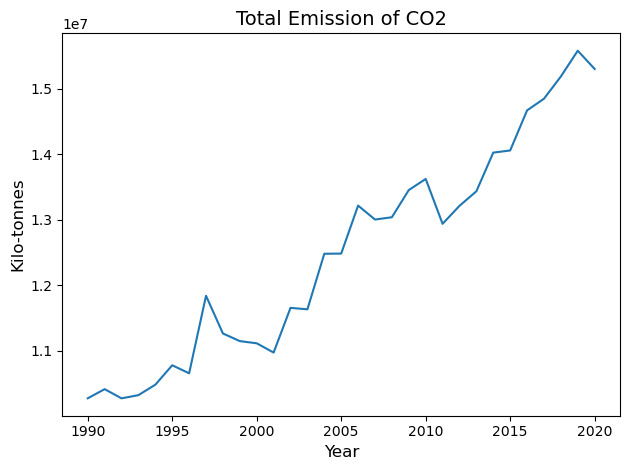

In [72]:

# Create a line plot using Seaborn
sns.lineplot(x='Year', y='Total_Emission', data=group_by_year)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Kilo-tonnes', fontsize=12)
plt.title('Total Emission of CO2', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

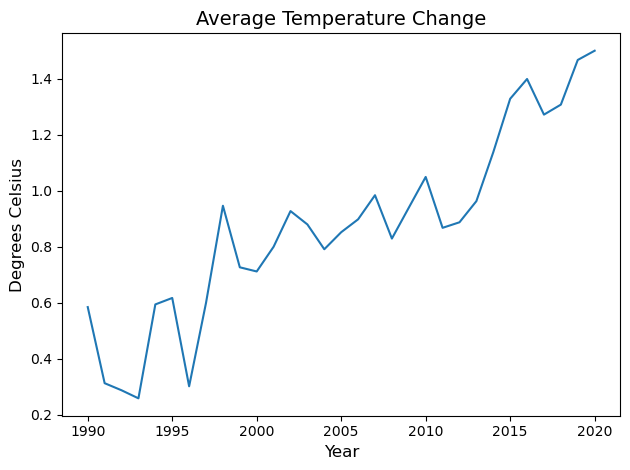

In [74]:
# Create a line plot using Seaborn
sns.lineplot(x='Year', y='Ave_Temp_Change', data=group_by_year)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Degrees Celsius', fontsize=12)
plt.title('Average Temperature Change', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

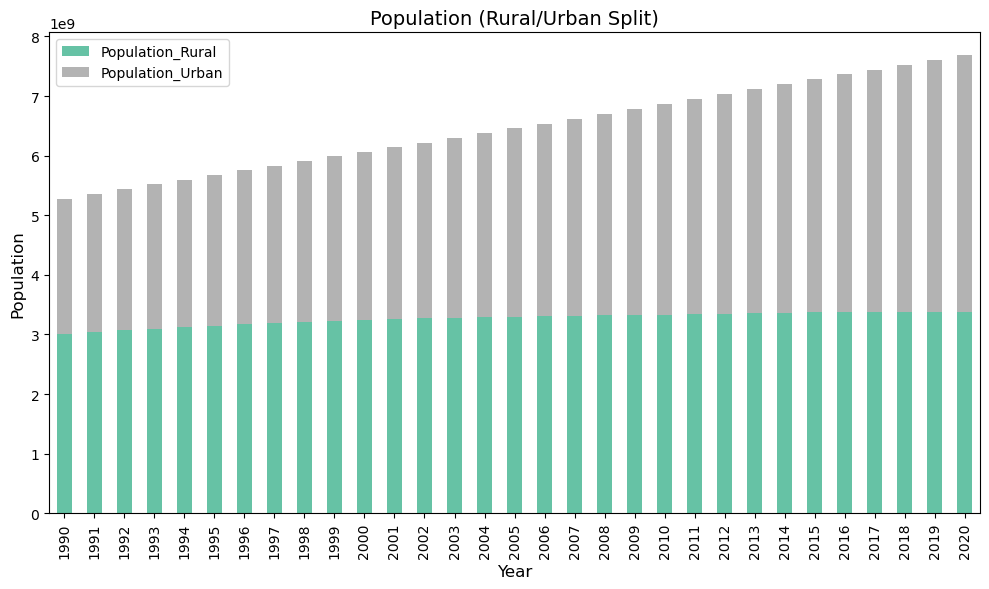

In [89]:
pop = group_by_year[['Year','Population_Rural','Population_Urban']]
# Set the 'Category' column as the index
pop.set_index('Year', inplace=True)

# Plot a stacked bar plot with Seaborn (using Matplotlib for stacking)
ax = pop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.title('Population (Rural/Urban Split)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



* ### Contributors: 
David Harrison